### LSE Data Analytics

# Turtle Games Customer Trends and Performance:
## Advanced Analytics for Organisational Impact

### Background and Context
Turtle Games is a game manufacturer and distributor that is looking to improve sales performance through the analysis of customers’ trends and reviews. To generate meaningful and actionable insights, it wants to look more closely at three questions:<br>
•How do customers accumulate/engage with loyalty points?<br>
> o And what does this insight tell us about possible predictive models? <br>

• What possible groups can be individuated for targeted marketing campaigns?<br>
• How can customers reviews help inform market campaigns and the business?

## Initial Data Wrangling and Exploration Phase:

In [4]:
# Imports all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  
import nltk 
import os 
import string
string.punctuation
nltk.download ('punkt')
nltk.download ('stopwords')
!pip install wordcloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from scipy.stats import norm
stop_words = set(stopwords.words('english'))
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Cleaning

In [8]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.info())
print(reviews.shape)
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None
(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [9]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [10]:
# Explore the data.
reviews.drop_duplicates()
print (reviews.shape)
print(reviews.value_counts())

(2000, 11)
gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  education     language  platform  product  review                                                                                                                                                                               summary          
Female  17   13.94              40                      233             postgraduate  EN        Web       7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96              82                      1150            postgraduate  EN        Web       2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34              13   

In [11]:
# Basic descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [12]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [116]:
# Rename the column headers.
reviews.rename(columns={"remuneration (k£)": "renumeration", "spending_score (1-100)": "spending_score"}, inplace=True)

# View column names.
reviews.columns

Index(['age', 'renumeration', 'spending_score', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

In [20]:
# Create a CSV file as output.
reviews.to_csv("turtle_reviews_cleaned.csv", index = False)

In [21]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
print(reviews_clean.shape)
print(reviews_clean.info())
print(reviews_clean.describe())
reviews_clean.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
               age  renumeration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min 

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Data Wrangling and Exploration Pt. 2
- Understanding the customer demographics 

In [23]:
# Exploring Turtle Games demographic.
# On gender basis as percentage values.
gen_demo=reviews['gender'].value_counts(normalize=True)*100
gen_demo

gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x24d85eee2d0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

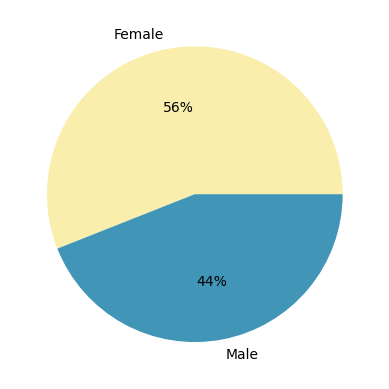

In [24]:
# Visualisation of gender demographic.
labels = ['Female', 'Male']
colours = ['#faeead','#4196b8']
plt.pie(gen_demo, labels = labels, colors = colours, autopct = '%.0f%%')

In [26]:
# Education background of demographic.
edu_demo=reviews['education'].value_counts(normalize=True)*100
edu_demo

education
graduate        45.0
PhD             23.0
postgraduate    20.0
diploma          9.5
Basic            2.5
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x24d861fef90>,
 [Text(0.17207795223283864, 1.086457168210212, 'Graduate'),
  Text(-1.0095301152477212, -0.4368626173156991, 'PhD'),
  Text(0.20611940355490968, -1.080515983906841, 'Postgraduate'),
  Text(0.9878303170254059, -0.4839331201369525, 'Diploma'),
  Text(1.0966090639752628, -0.0863050450860107, 'Basic')],
 [Text(0.09386070121791197, 0.5926130008419338, '45%'),
  Text(-0.5506527901351206, -0.23828870035401767, '23%'),
  Text(0.11242876557540527, -0.5893723548582768, '20%'),
  Text(0.5388165365593123, -0.2639635200747013, '9%'),
  Text(0.5981503985319614, -0.04707547913782401, '3%')])

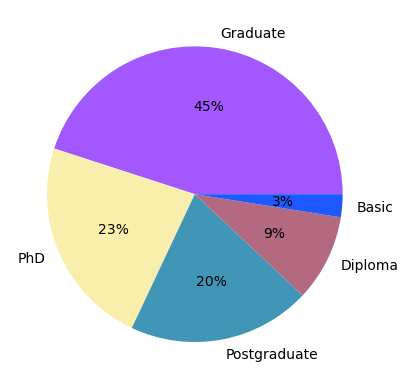

In [28]:
# Visualisation.
labels = ['Graduate', 'PhD', 'Postgraduate', 'Diploma', 'Basic']
colours = ['#a358ff', '#faeead','#4196b8', '#b36a80', '#1e59ff']
plt.pie(edu_demo, labels = labels, colors = colours, autopct = '%.0f%%')

<Axes: xlabel='age', ylabel='Count'>

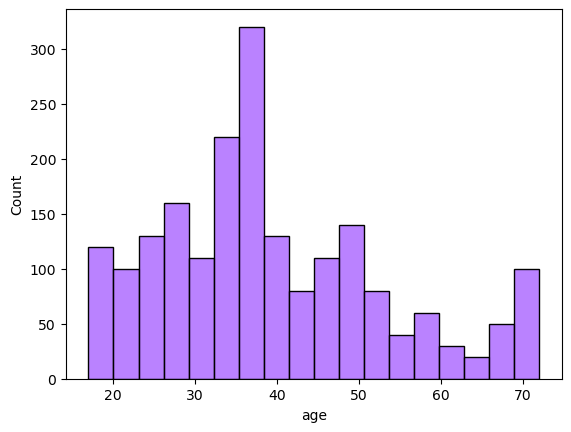

In [53]:
# Age demographic.
sns.histplot(reviews_clean, x = 'age', color = '#a358ff')

* The gender demographic is pretty balanced with an actual majority of female users which is an advantage especially in a male     dominated industry.
* Strong majority of graduate users, with a good presence of PhD and postgraduates as well.
* The age distribution is not even but it does span a pretty large range (dips after the mid 50s but rises again towards the     70s), as shown as well by the summary descriptive statistics, the 30s-40s range and the mean at the 39.5 age.

In [327]:
# Messed around with colours for the initial exploratory analysis
# Will set proper features for future graphs.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Colour palette to make charts look better.
blue, = sns.color_palette('pastel', 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)   

## Possible Correlations

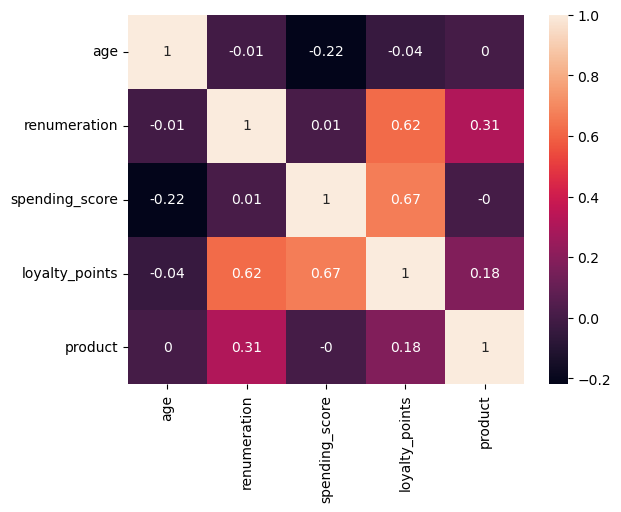

In [59]:
# Make a correlation matrix to better visualise.
matrix = reviews_clean.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

* There is a good correlation between loyalty_points and spending_score as well as loyalty_points and renumeration.

  ** Reminder: correlation does not mean causation.

## Linear Regression Phase

### spending vs loyalty

In [69]:
# Define independent variable.
x1 = reviews_clean['spending_score']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Create OLS model and print summary of metrics.
# Create formula and pass through OLS methods.
f1 = 'y ~ x1'
model1 = ols(f1, data = reviews_clean).fit()

# View summary.
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          2.92e-263
Time:                        15:51:46   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations from the OLS model:
* 𝑅2: Roughly 45% of the total variability of y (loyalty_points), is explained by the variability of X (spending score).  
* X: The coefficient of X describes the slope of the regression line: how much the response variable y change when x changes by 1 unit. In this case, if the customer's spending score (x) changes by 1 unit, the loyalty points (y) will change by 33.0617 units. 
* The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, thus the estimated slope is significant.

In [70]:
# Extract the estimated parameters.
print("Model parameters: ", model1.params)

# Extract the standard errors.
print("Standard Errors: ", model1.bse)

# Extract the predicted values.
print("Predicted Values: ", model1.predict())

Model parameters:  Intercept   -75.052663
x1           33.061693
dtype: float64
Standard Errors:  Intercept    45.930554
x1            0.814419
dtype: float64
Predicted Values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [98]:
# Set the X coefficient and the constant to generate the regression table.
intercept,coeff = model1.params
y_pred = intercept + coeff * x1

# View the output.
y_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Relationship between Spending Score and Loyalty Points')

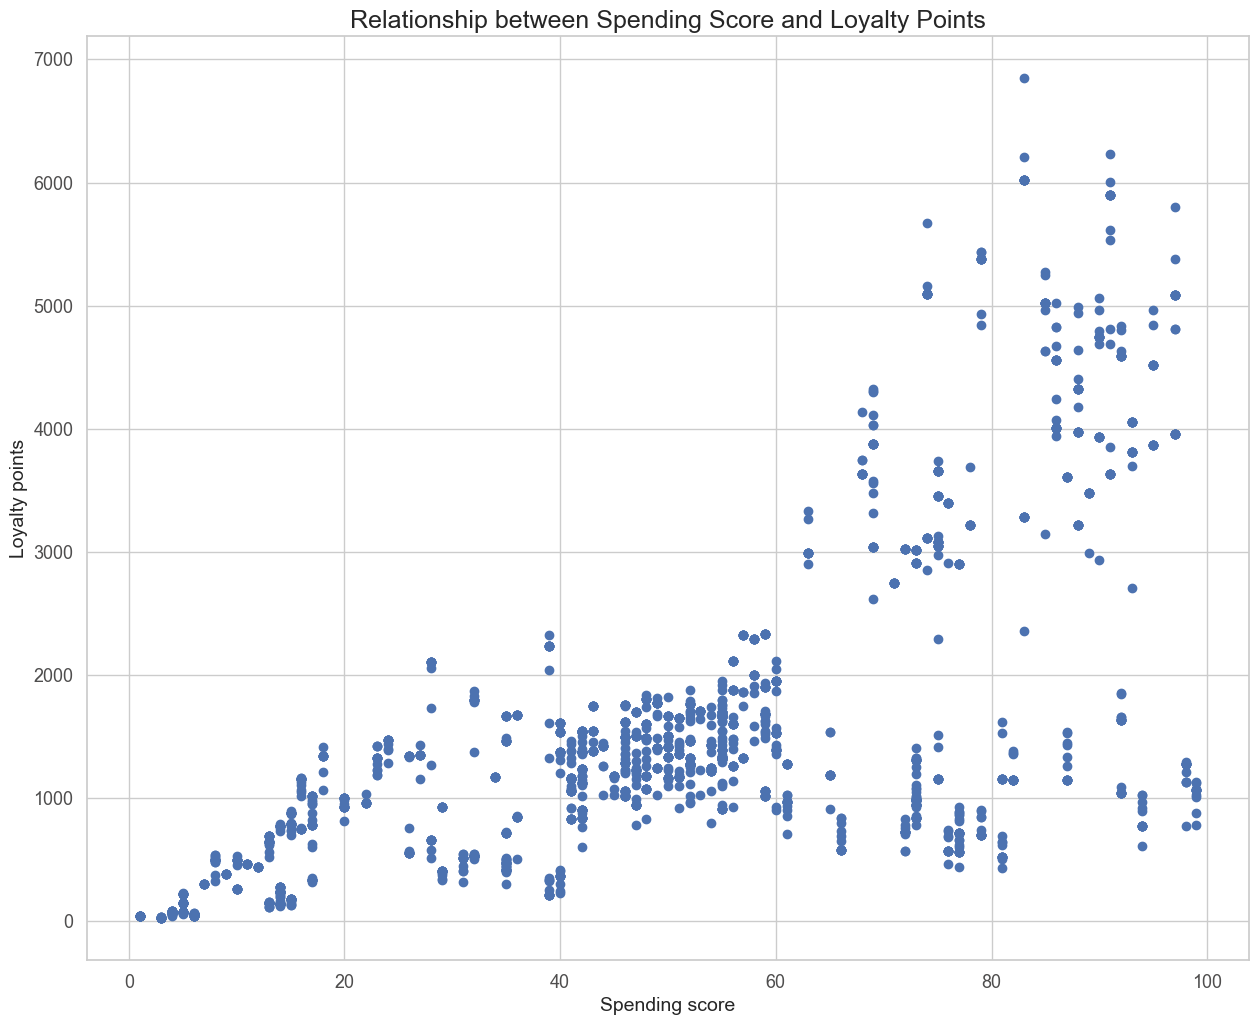

In [316]:
# Visualize the data
plt.scatter(x1, y)
plt.xlabel('Spending score')
plt.ylabel('Loyalty points')
plt.title('Relationship between Spending Score and Loyalty Points')

Text(0.5, 1.0, 'Linear Regression plot between Spending Score and Loyalty Points')

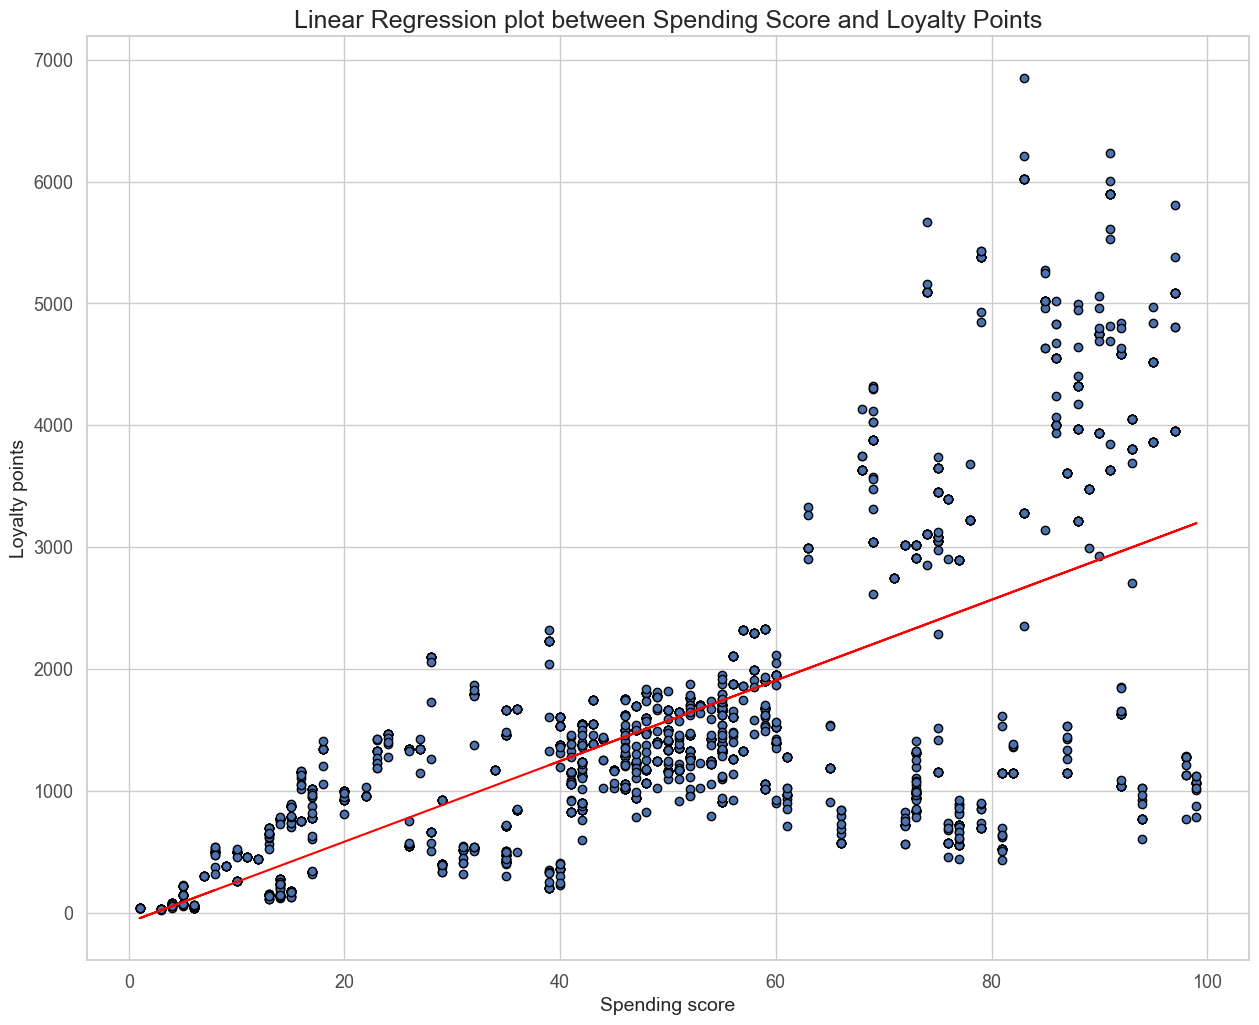

In [317]:
# Plot the graph with a regression line.
plt.scatter(x1, y, edgecolors = 'black')
plt.plot(x1, model1.predict(), color = 'red')
plt.xlabel('Spending score')
plt.ylabel('Loyalty points')
plt.title('Linear Regression plot between Spending Score and Loyalty Points')

### renumeration vs loyalty

In [118]:
# Define independent variable.
x2 = reviews_clean['renumeration']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Create OLS model and print summary of metrics.
# Create formula and pass through OLS methods.
f2 = 'y ~ x2'
model2 = ols(f2, data = reviews_clean).fit()

# View summary.
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          2.43e-209
Time:                        12:21:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations from the OLS results:
* 𝑅2: Around 38% of the total variability of y (loyalty_points), is explained by the variability of x (renumeration).
* X: The coefficient of x describes the slope of the regression line: how much the response variable y change when x changes by 1 unit. In this case, if the customer's renumeration (x) changes by 1 unit, the loyalty points (y) will change by 34.1878 units.
* The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, and as such the estimated slope is significant.

In [95]:
# Extract the estimated parameters.
print("Model parameters: ", model2.params)

# Extract the standard errors.
print("Standard Errors: ", model2.bse)

# Extract the predicted values.
print("Predicted Values: ", model2.predict())

Model parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard Errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted Values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [97]:
# Set the the X coefficient and the constant to generate the regression table.
intercept,coeff = model2.params
y_pred_ren = intercept + coeff * x2

# View the output.
y_pred_ren

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: renumeration, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Relationship between Renumeration and Loyalty Points')

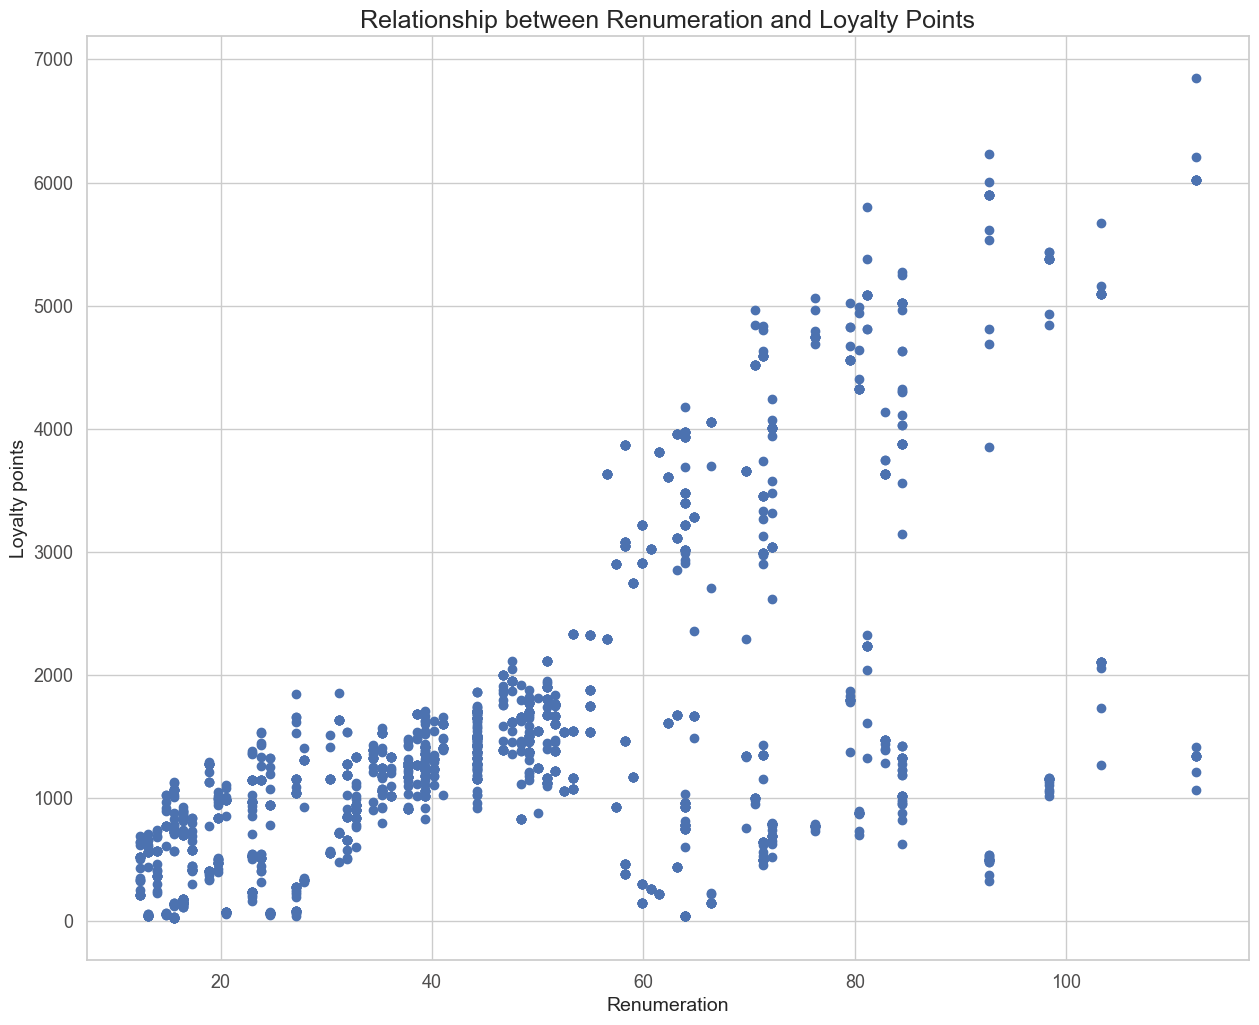

In [278]:
# Visualize the data without linear regression line.
plt.scatter(x2, y)
plt.xlabel('Renumeration')
plt.ylabel('Loyalty points')
plt.title('Relationship between Renumeration and Loyalty Points')

Text(0.5, 1.0, 'Linear Regression plot between Renumeration and Loyalty Points')

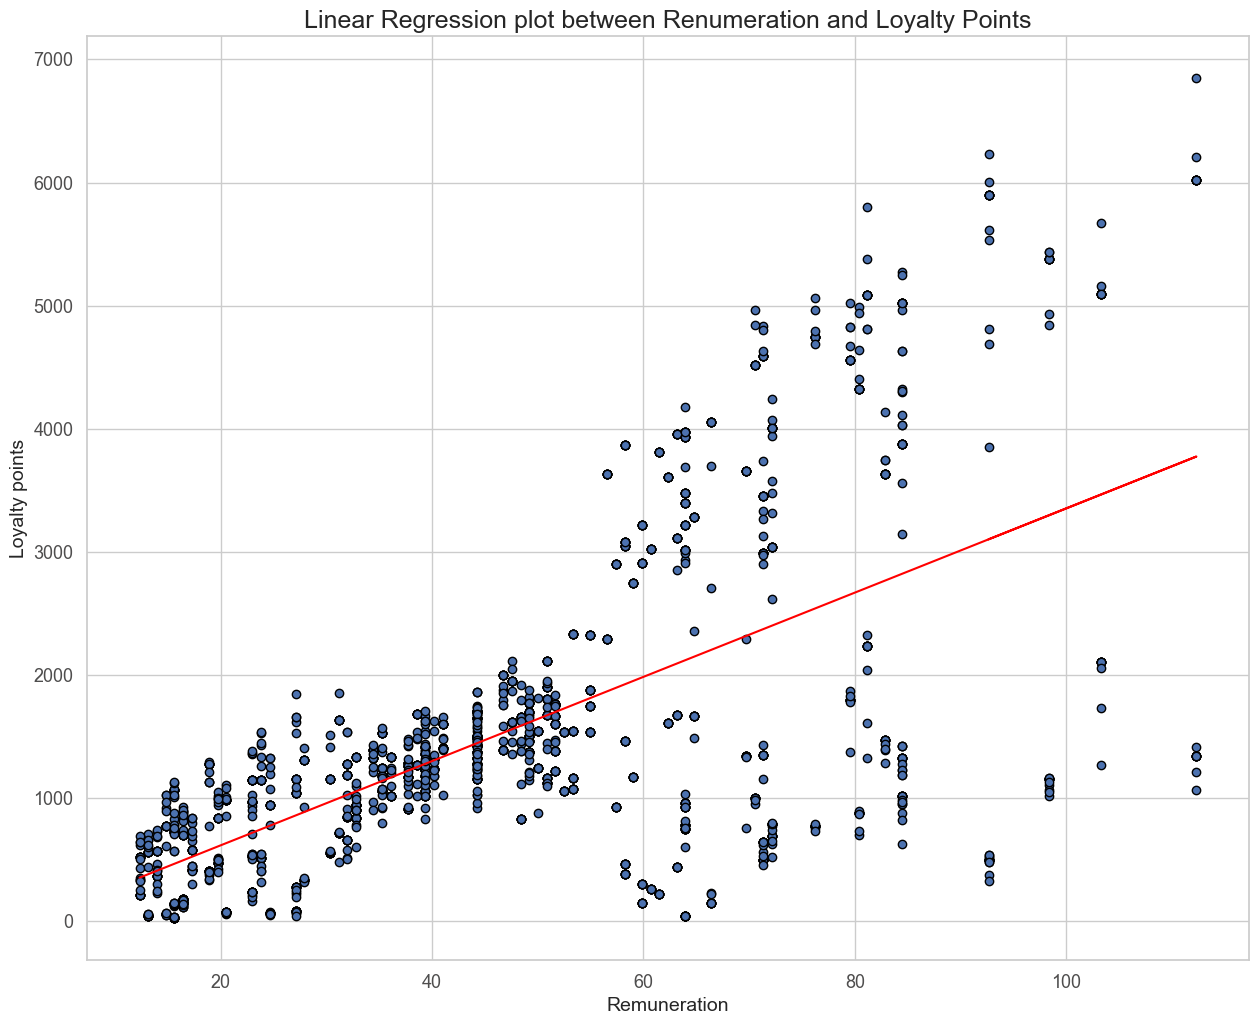

In [507]:
# Plot graph with regression line.
plt.scatter(x2, y, edgecolors = 'black')
plt.plot(x2, model2.predict(), color = 'red')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty points')
plt.title('Linear Regression plot between Renumeration and Loyalty Points')

### 5c) age vs loyalty

In [107]:
# Define independent variable.
x3 = reviews_clean['age']

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Create OLS model and print summary of metrics.
# Create formula and pass through OLS methods.
f3 = 'y ~ x3'
model3 = ols(f3, data = reviews_clean).fit()

# View model.
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 19 Apr 2024   Prob (F-statistic):             0.0577
Time:                        12:00:27   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations from the OLS model:
* 𝑅2: From the 𝑅2 only 2% is explained of the variable y (loyalty points) by the variable x (age).
* X: The coefficent explains the slope of the regression line. In this case, it's actually negative suggesting a negative relationship between the two variables.
* T-value: with the t-value being slightly above 0.05, it shows the the estimated slope is not actually very significant. But it is very borderline as it stands at 0.058.

In [108]:
# Extract the estimated parameters.
print("Model parameters: ", model3.params)

# Extract the standard errors.
print("Standard Errors: ", model3.bse)

# Extract the predicted values.
print("Predicted Values: ", model3.predict())

Model parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard Errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted Values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [109]:
# Set the X coefficient and the constant to generate the regression table.
intercept, coeff = model3.params
y_pred_age = intercept + coeff * x3

# View the output.
y_pred_age

0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Relationship between Age and Loyalty Points')

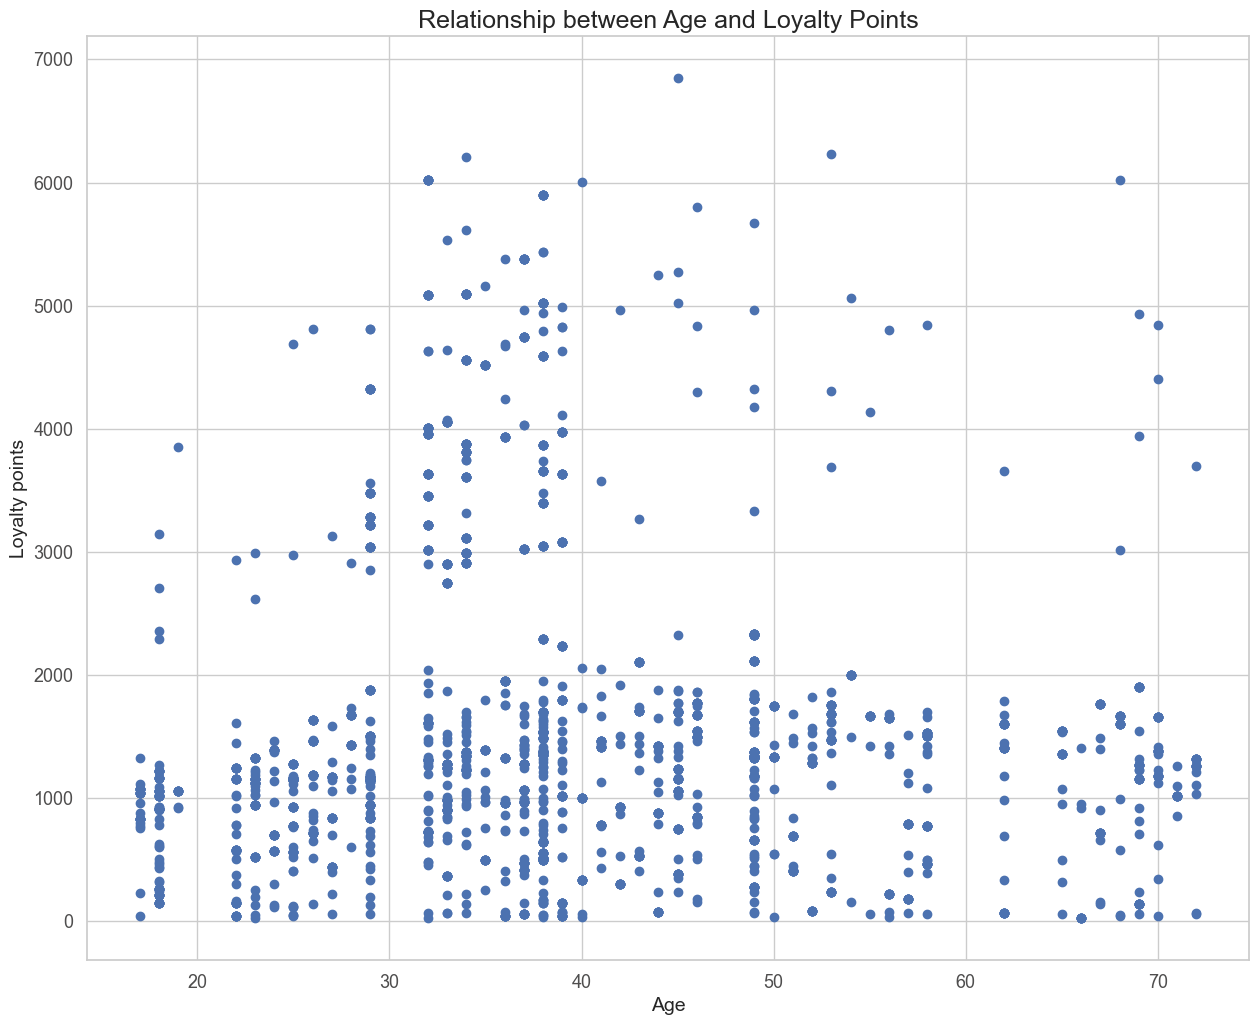

In [280]:
# Visualize the data
plt.scatter(x3, y)
plt.xlabel('Age')
plt.ylabel('Loyalty points')
plt.title('Relationship between Age and Loyalty Points')

Text(0.5, 1.0, 'Linear Regression plot between Age and Loyalty Points')

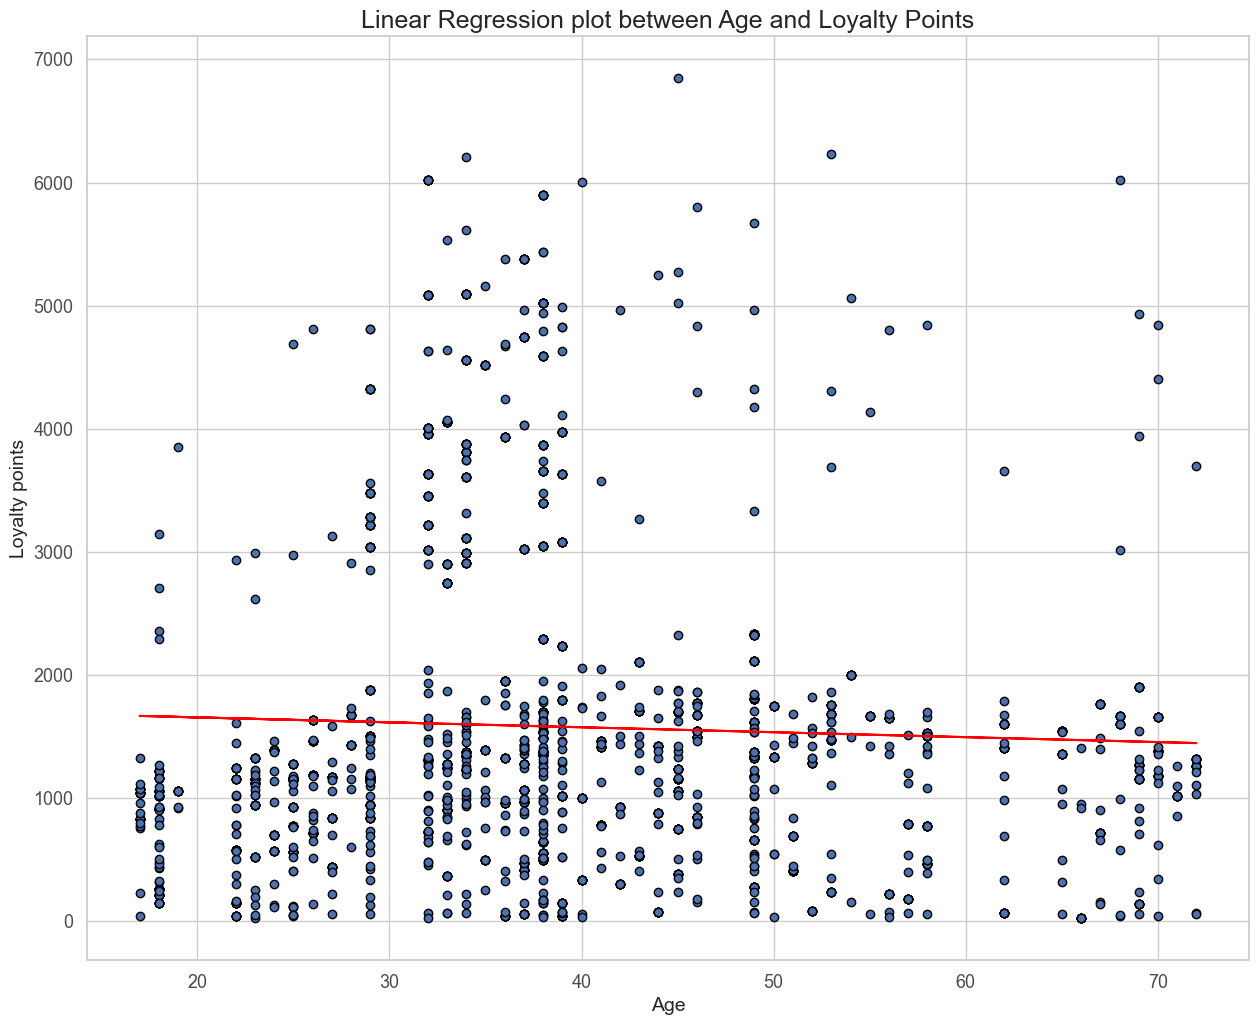

In [281]:
# Plot graph with regression line.
plt.scatter(x3, y, edgecolors = 'black')
plt.plot(x3, model3.predict(), color = 'red')
plt.xlabel('Age')
plt.ylabel('Loyalty points')
plt.title('Linear Regression plot between Age and Loyalty Points')

## Multiple Linear regression

Having explored simple/univariable linear regressions with three different indipendent variables and having found that the resulting models are not incredibly explicative of the dependent variable (loyalty points). It is worth investigating if a multiple linear regrassion model can better predict the y values of the dependent variable.
* the age variable haas been excluded as it could compromise the assumption of linearity in the model.

In [158]:
# Create independent variable containing all three previous variables.
x4 = reviews_clean[['renumeration', 'spending_score']]

# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = train_test_split(x4, y, test_size=0.20, random_state=5)

# Add a constant.
X_train = sm.add_constant(X_train)

# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model4 = sm.OLS(Y_train, X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:30:07   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.089      0.000   -1779.623   -1621.138
renumeration      33.6030      0.576     58.322      0.000      32.473      34.733
spending_score    32.9368      0.510     64.595      0.000      31.937      33.937
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.215
Skew:                           0.102   Prob(JB):                        0.122
Kurtosis:                       3.148   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations from OLS model results:
* the R2 is quite high, showing that roughly 82% of the dependent variable (loyalty points) can be explained by the independent variables.
* the t-value being 0 shows that the two independent variables are quite significant.

### Checking Assumptions
Having checked for linearity in the relationship between the independent variables and the dependent variable in the previous linear model, we will check for multicollinearity in the model.

In [159]:
# Checking for multicollinearity.
# Add a constant.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame.
vif = pd.DataFrame()

# Calculate the 'vif' for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) 
                     for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to two decimal points.
print(vif.round(2))

   VIF Factor        features
0        9.45           const
1        1.00    renumeration
2        1.00  spending_score


The variance inflation factor (VIF) measures multicollinearity by identifying the correlation between independent variables and the strength of correlation. 
If the VIF is 1 there is no correlation between the independent variables.
If the VIF is between 1 and 5 there is a moderate correlation.
If the VIF is higher than 10, it means there is high multicollinearity and the model will result in large standard errors and unreliable p-values.

With a VIF of 1 we can assume there is no correlation between the independent variables.

Text(0.5, 1.0, 'Residuals vs Predicted Values')

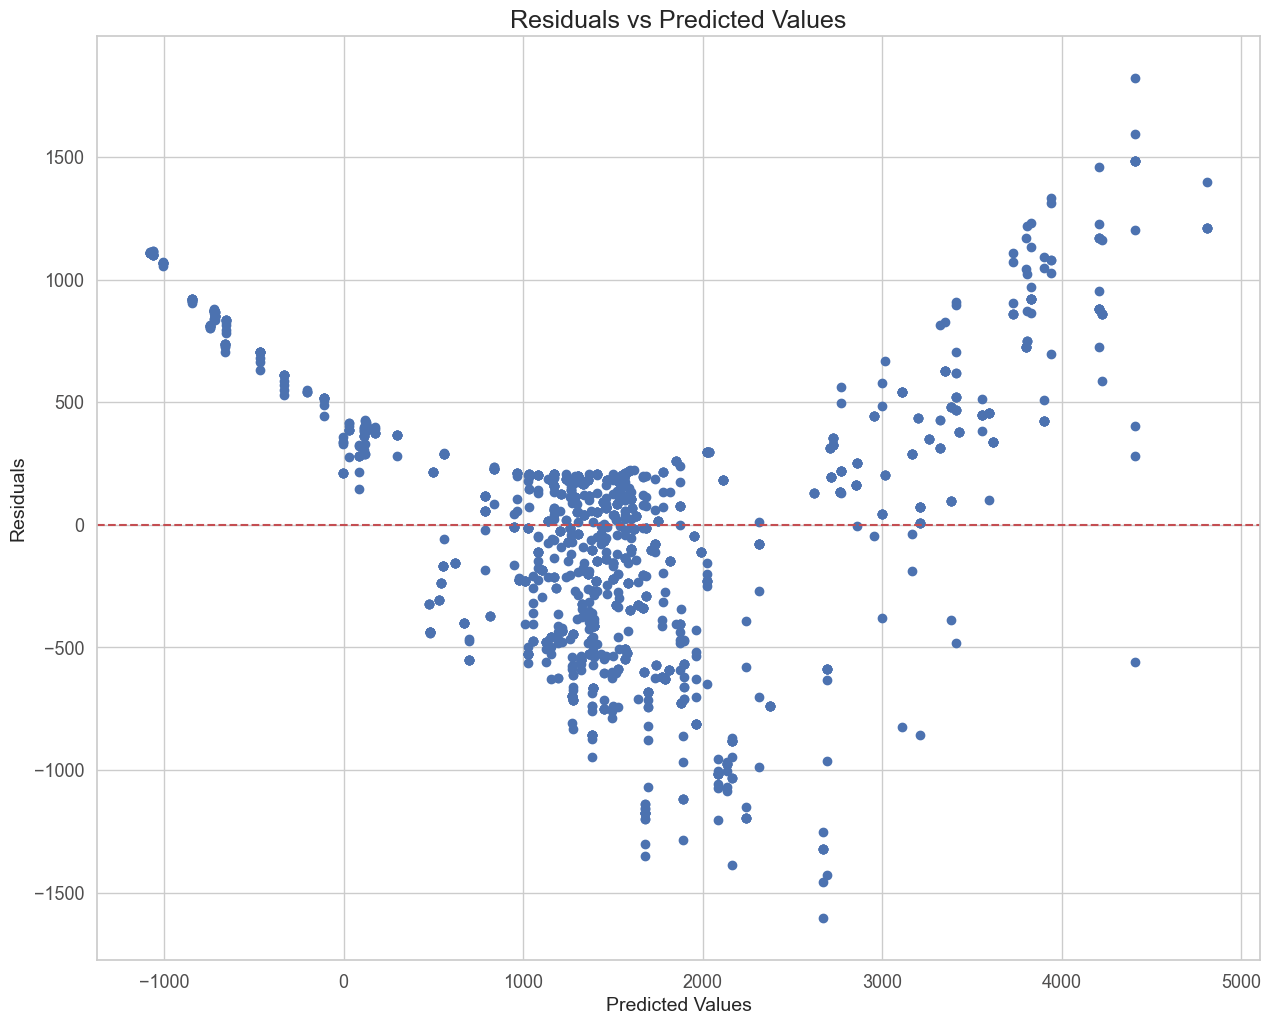

In [318]:
# Check for homoscedasticity
# Plot the residuals against the predicted values. 
# If there is a cone pattern or trend, it may indicate heteroscedasticity.

y_pred = model4.predict()

residuals = model4.resid

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

In [171]:
# Checking for homoscedasticity with the Breusch Pagan method.
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(model4.resid, model4.model.exog) 
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 39.230974380834205, 'LM Test p-value': 3.0276254927307376e-09, 'F-stat': 20.070832089116433, 'F-test p-value': 2.4609115607488977e-09}


Both the graphical rapresentation and the Breusch Pagan method confirm that homoscedasticity in the model as the p-value is greater than 0.05 for the Breusch-Pagan results and the graph doesn't show a cone like pattern.

<Axes: ylabel='Count'>

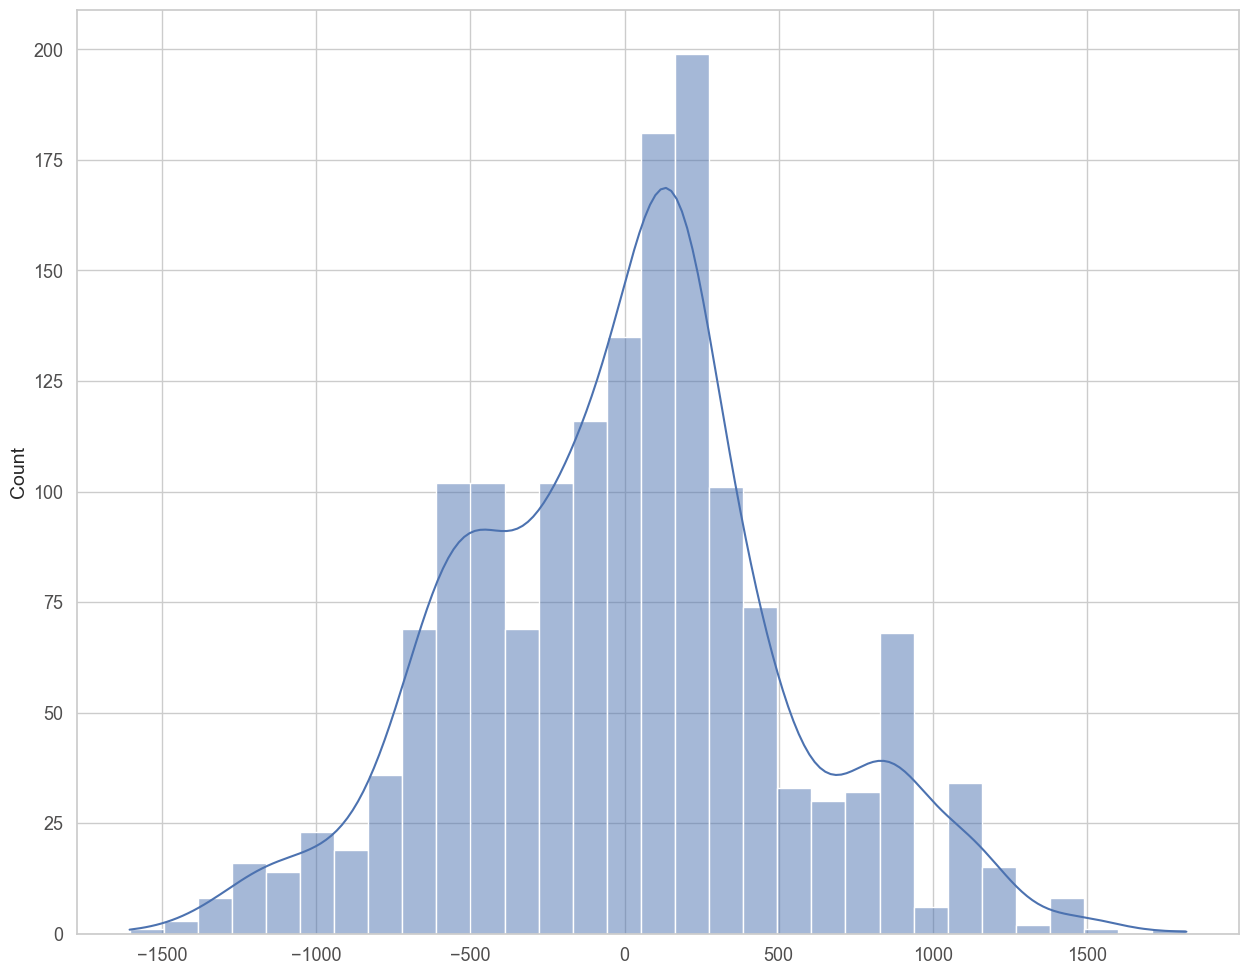

In [283]:
# Checking for normality in the residuals.
# Histogram:
sns.histplot(residuals, kde=True)

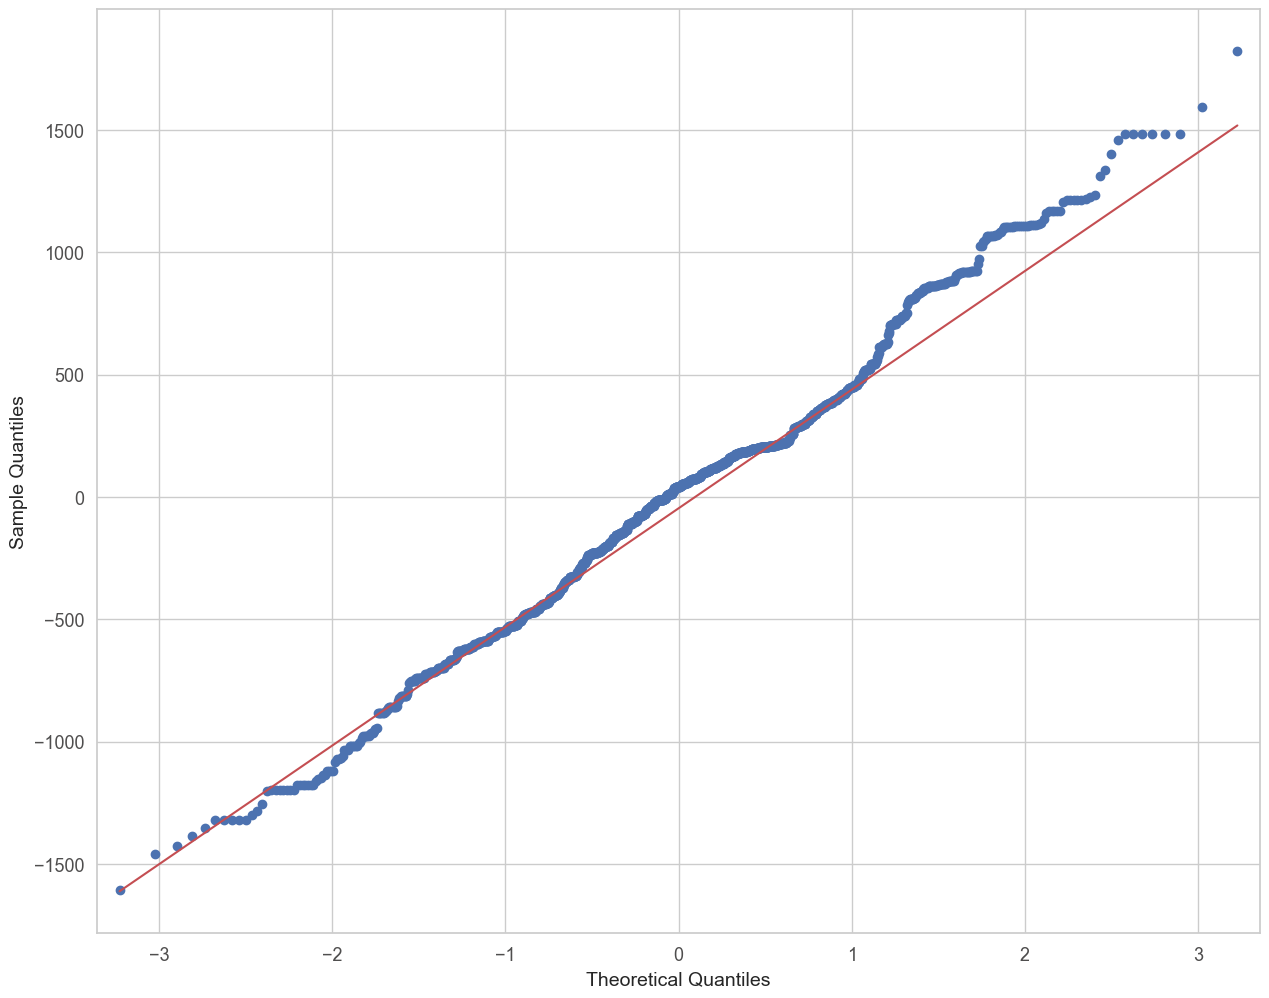

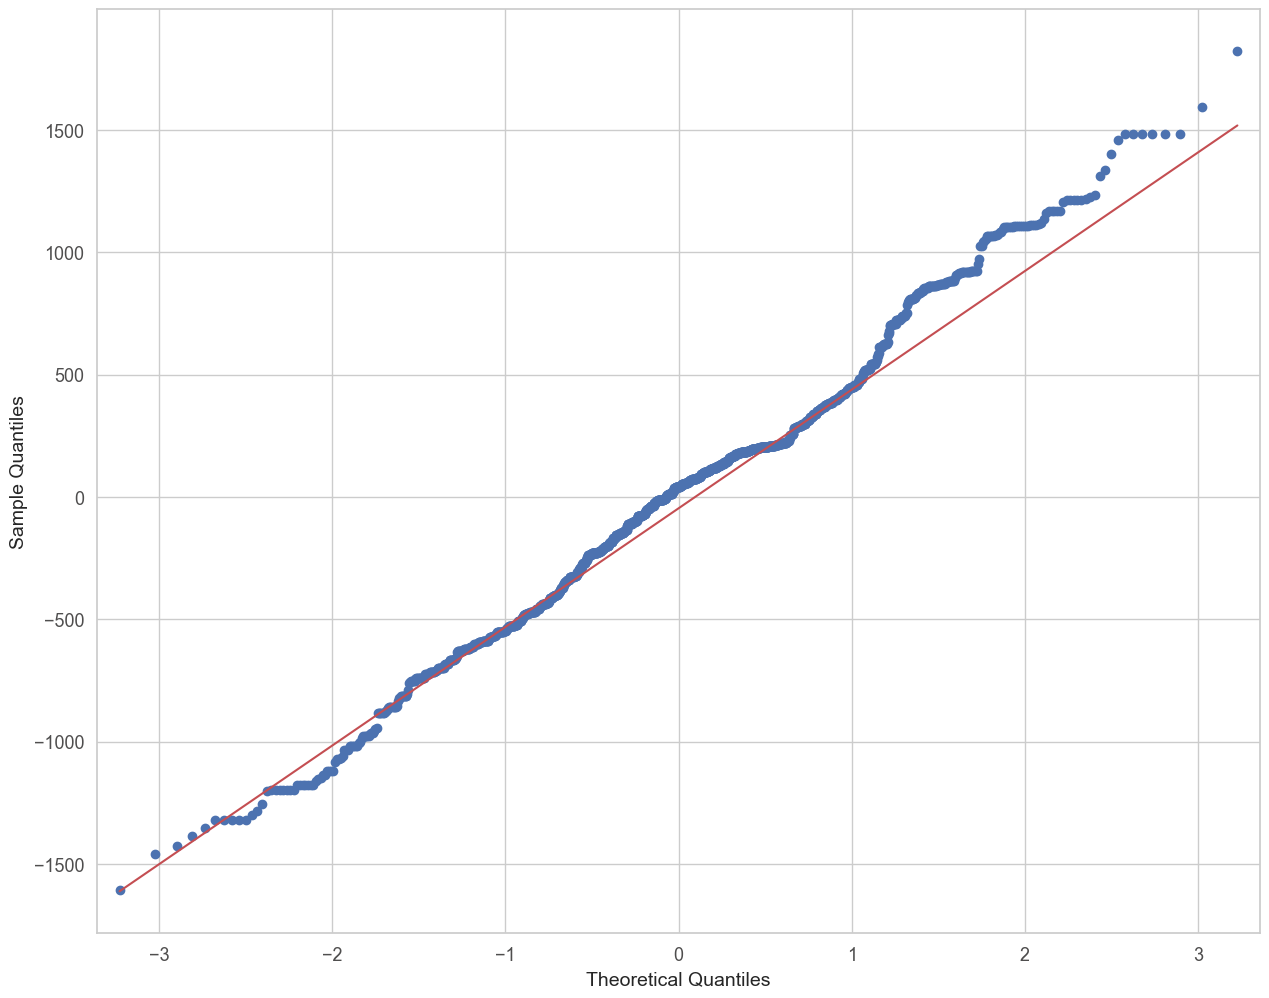

In [284]:
# Checking for normality with a Q-Qplot
from statsmodels.api import qqplot
qqplot(residuals, line = 'q')

In [168]:
# check normality of residuals
from scipy.stats import shapiro
#perform Shapiro-Wilk test
shapiro(residuals)

ShapiroResult(statistic=0.9912799000740051, pvalue=3.703021178580457e-08)

The residuals seems fairly normally distributed. While the histogram is not a perfect bell shape it does follow a close pattern. The Q-Q plot showed more clearly how the residuals are distributed along a normal distribution line. similarly, we confirm that the distribution is normal through the Shapiro-Wilk test where we reject the null hypotesis if the p-value is less than 0.05: with a p-value of 3.70 we fail to reject the null hypotesis and we confirm normal distribuition.

In [170]:
# Checking for independence.
# The Durbin-Watson method.
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

1.9704874859603527

The Durbin-Watson method is based on a scale between 0 and 4, with a result closer to 0 meaning a positive serial correlation and with a result closer to 4 meaning a negative serial correlation, and with 2 meaning no correlation. 
With a result of 1.970 we can confirm our assumption of independence.

## Observations and insights

The univariate linear regression models showed a positive relationship between loyalty points and spending score as well as loyalty points and remuneration, while the relationship between loyalty points and age did not provide many insights. As such, it was chosen to use a multiple regression model that included only spending score and remuneration as the independent variables.

The multiple regression model showed an R2 of 82%, which is can be improved upon but it is still prettyl explicative of the dependent variable. While checking the assumptions for the regression model it can be seen that:
* There is linearity between the dependent and the independent variables.
* There is no multicollinearity between the independent variables as shown by the VIF result of 1.
* There is homoscedasticity in the model as such it makes it more robust and accurate in its predictions.
* While the distribution in the residuals is still normal, it could be improved upon to build a more robust model as the histogram did not show a perfect bell shape.
* Independence was confirmed through the Durbin-Watson method with a value of 1.97, it can be assumed that there is not serial correlation.

In [206]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn import tree

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [228]:
# Specify Y.
y = reviews['loyalty_points']
# Specify X.
X = reviews.drop(columns=['loyalty_points', 'review', 'summary', 'education'], axis = 1)

In [229]:
# Review X and Y.
print(y.head())
X.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64


age  renumeration  spending_score  product
0   18         12.30              39      453
1   23         12.30              81      466
2   22         13.12               6      254
3   25         13.12              77      263
4   33         13.94              40      291

## Create train and test data sets.

In [230]:
# Split the data into test and train data.
# Create testing data.
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

## Create Decision tree regressor

In [243]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.score(X_test, y_test))

0.9946972201171127


In [244]:
# Print MAE and MSE
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate RMSE with math
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy_score(y_test,y_pred)

Mean Absolute Error:  32.596666666666664
Mean Squared Error:  8589.426666666666
Root Mean Squared Error:  92.67915982930934


0.6866666666666666

[Text(0.5373926748372643, 0.9782608695652174, 'x[2] <= 67.0\nsquared_error = 1656896.237\nsamples = 1400\nvalue = 1585.032'),
 Text(0.24593181479962328, 0.9347826086956522, 'x[2] <= 15.5\nsquared_error = 374328.242\nsamples = 982\nvalue = 1081.541'),
 Text(0.10605809325246399, 0.8913043478260869, 'x[1] <= 68.88\nsquared_error = 60040.123\nsamples = 208\nvalue = 279.745'),
 Text(0.07261656557998483, 0.8478260869565217, 'x[2] <= 6.5\nsquared_error = 13058.046\nsamples = 155\nvalue = 155.252'),
 Text(0.04056103108415466, 0.8043478260869565, 'x[1] <= 43.46\nsquared_error = 2961.673\nsamples = 81\nvalue = 79.136'),
 Text(0.01819560272934041, 0.7608695652173914, 'x[2] <= 3.5\nsquared_error = 262.749\nsamples = 52\nvalue = 58.462'),
 Text(0.004548900682335102, 0.717391304347826, 'x[0] <= 27.5\nsquared_error = 6.889\nsamples = 9\nvalue = 31.0'),
 Text(0.003032600454890068, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 25.0'),
 Text(0.006065200909780136, 0.6739130434782609, 'x[

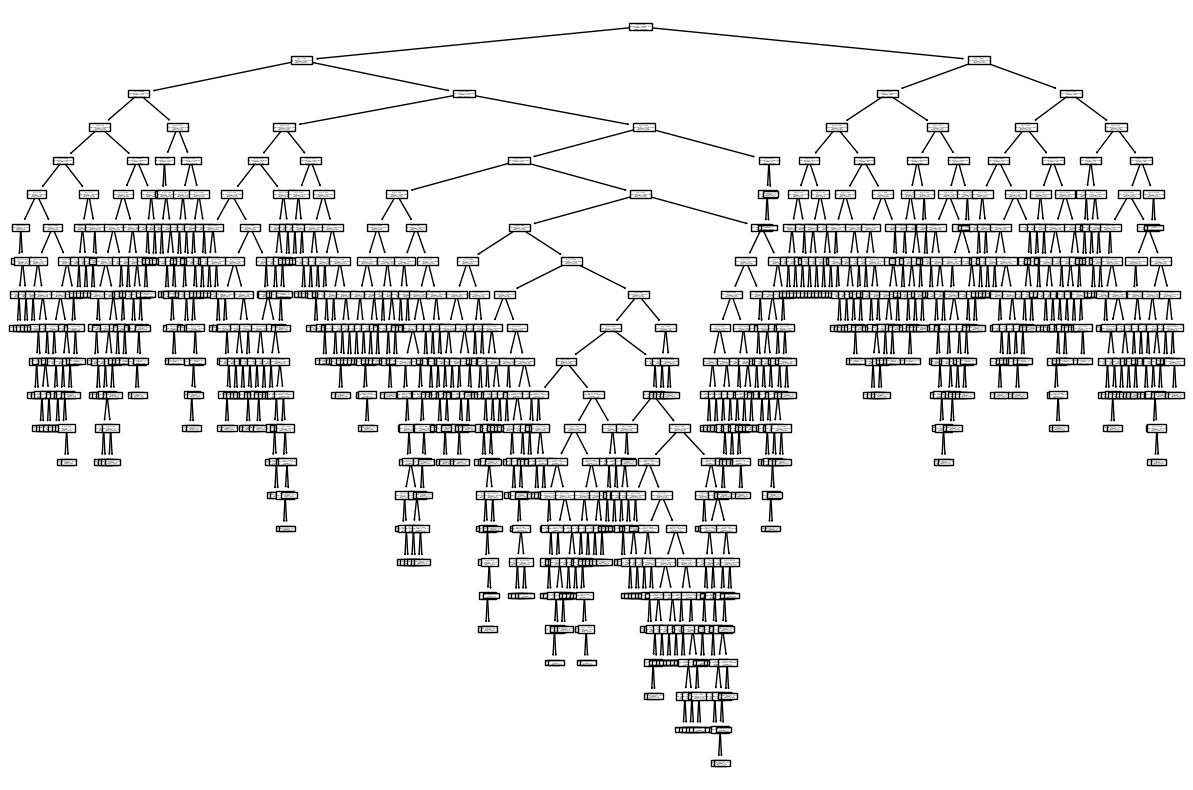

In [216]:
# Unpruned model.
plot_tree(regressor)

<Axes: >

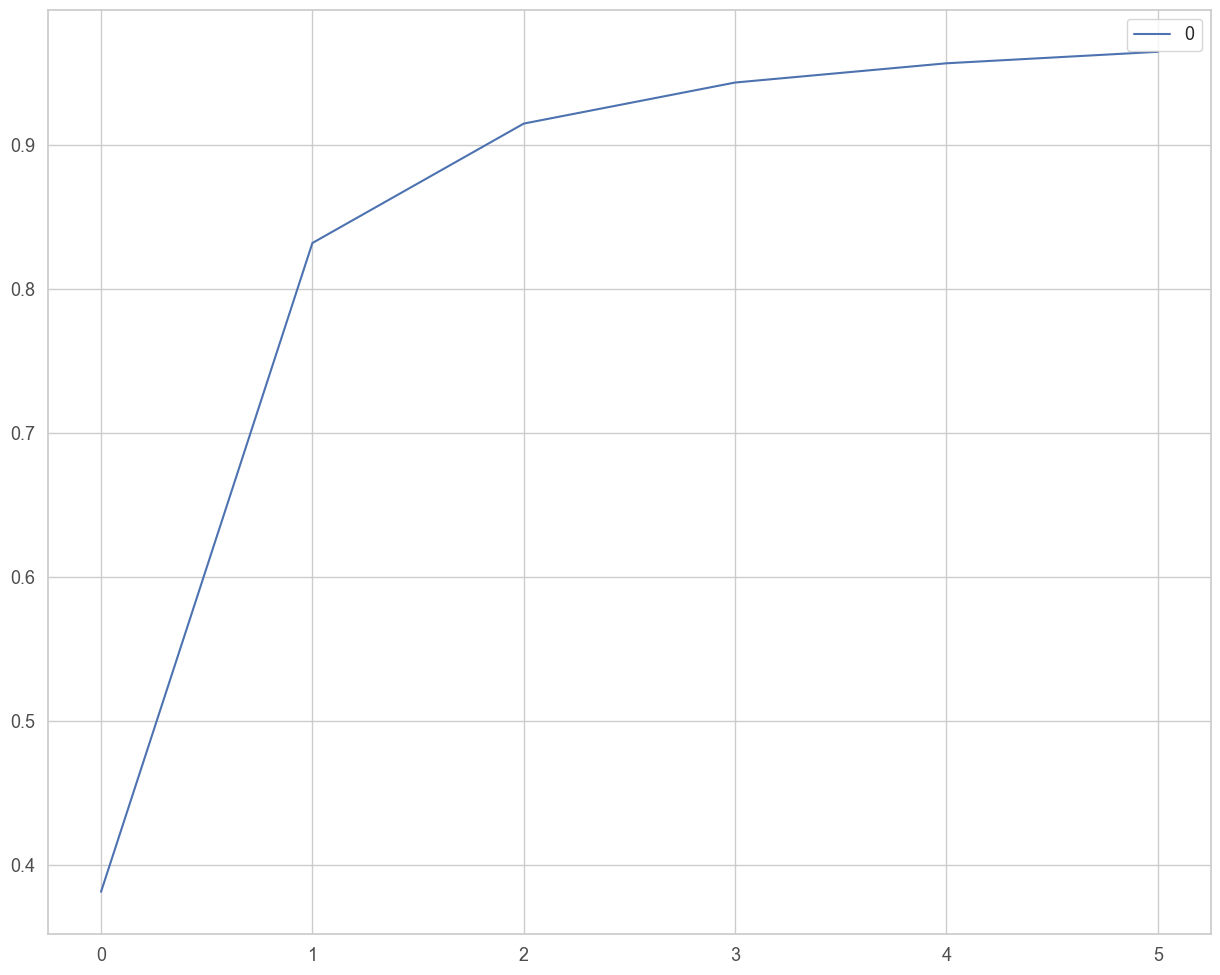

In [319]:
# Evaluate the model.
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    regressor = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

## Fit and plot final model.

In [320]:
# Fit and plot final model.
regressor = DecisionTreeRegressor(random_state = 42, max_depth = 3)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)

[Text(0.5, 0.875, 'x[2] <= 82.5\nsquared_error = 1619796.947\nsamples = 600\nvalue = 1561.698'),
 Text(0.25, 0.625, 'x[2] <= 37.5\nsquared_error = 691835.469\nsamples = 517\nvalue = 1241.65'),
 Text(0.125, 0.375, 'x[2] <= 15.5\nsquared_error = 255353.411\nsamples = 187\nvalue = 667.968'),
 Text(0.0625, 0.125, 'squared_error = 74657.516\nsamples = 90\nvalue = 320.133'),
 Text(0.1875, 0.125, 'squared_error = 206594.993\nsamples = 97\nvalue = 990.701'),
 Text(0.375, 0.375, 'x[1] <= 55.76\nsquared_error = 646997.849\nsamples = 330\nvalue = 1566.736'),
 Text(0.3125, 0.125, 'squared_error = 123677.192\nsamples = 285\nvalue = 1304.2'),
 Text(0.4375, 0.125, 'squared_error = 760162.782\nsamples = 45\nvalue = 3229.467'),
 Text(0.75, 0.625, 'x[1] <= 43.87\nsquared_error = 2787696.43\nsamples = 83\nvalue = 3555.253'),
 Text(0.625, 0.375, 'x[1] <= 15.17\nsquared_error = 44285.429\nsamples = 23\nvalue = 1147.696'),
 Text(0.5625, 0.125, 'squared_error = 8712.0\nsamples = 3\nvalue = 838.0'),
 Text(0.6

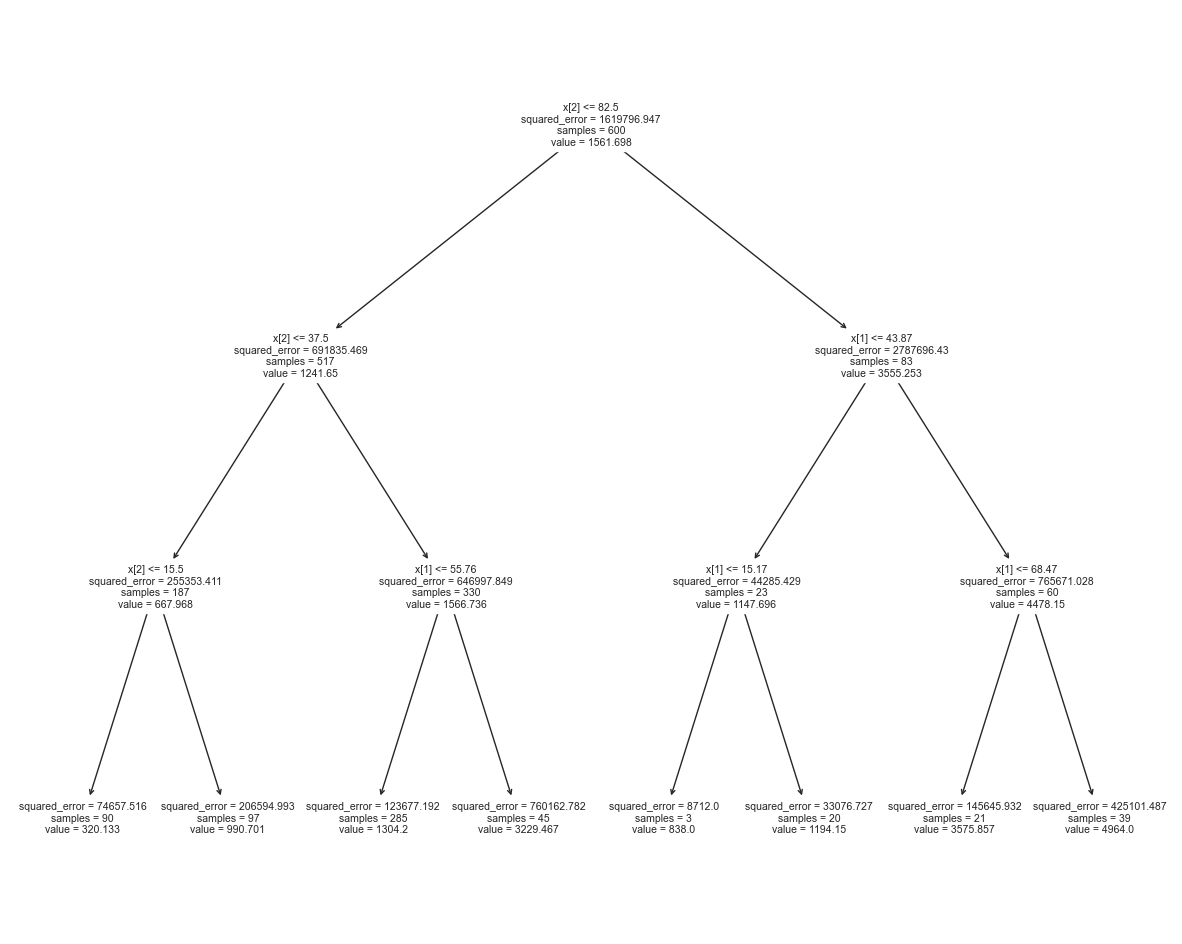

In [321]:
plot_tree(regressor)

## Observations

The model is actually quite weak given the result of the subtraction of the Root Mean Squared Error and the Mean Absolute Error being roughly 60. Furthermore, the accuracy score is 68.66% which is not incredibly high, even when changing the independent variables. But the regressor score being 99 is a good indication that adding the product to the analysis helps explain the dependent variable better.

In [256]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [258]:
# Drop unnecessary columns.
df3 = reviews_clean[['renumeration', 'spending_score']]

# View DataFrame.
df3

renumeration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [259]:
# Explore the data.
df3.head()

<bound method DataFrame.info of       renumeration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]>


renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [261]:
# Descriptive statistics.
df3.describe()

renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## Plot

Text(0, 0.5, 'Remuneration')

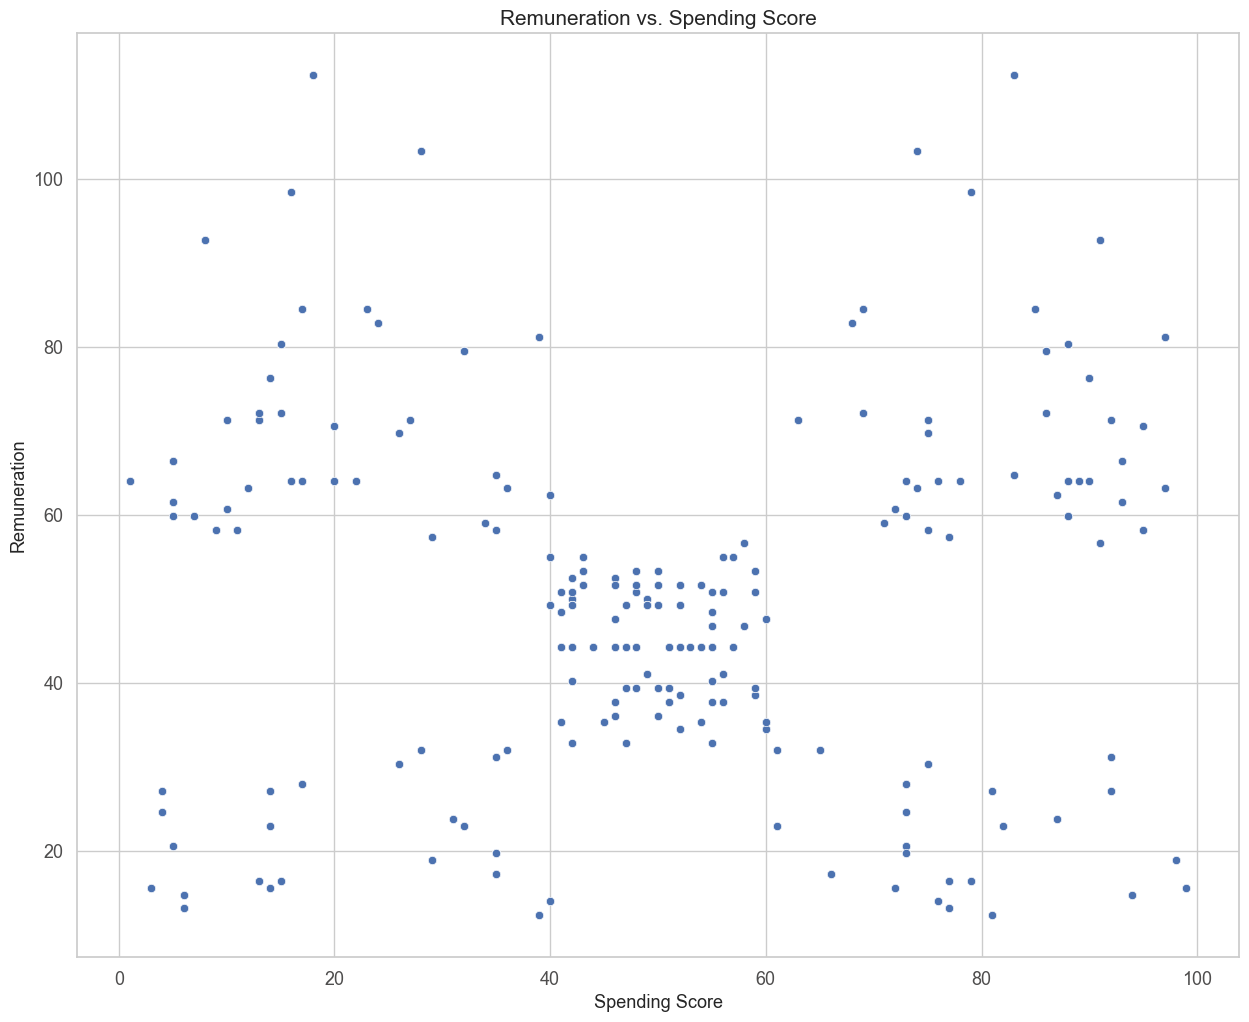

In [508]:
# Create a scatterplot with Seaborn.
sns.scatterplot(y='renumeration',
                x='spending_score',
                data=df3)
plt.title("Remuneration vs. Spending Score", size = 15)
plt.xlabel("Spending Score", size = 13)
plt.ylabel("Remuneration", size = 13)

Possible clusters from the initial scatterplot:

* Bottom left: low spending score, low remuneration.
* Bottom right: high spending score, low remuneration.
* Center: medium spending score, medium remuneration.
* Top left: high spending score, high remuneration.
* Top right: low spending score, high remuneration.

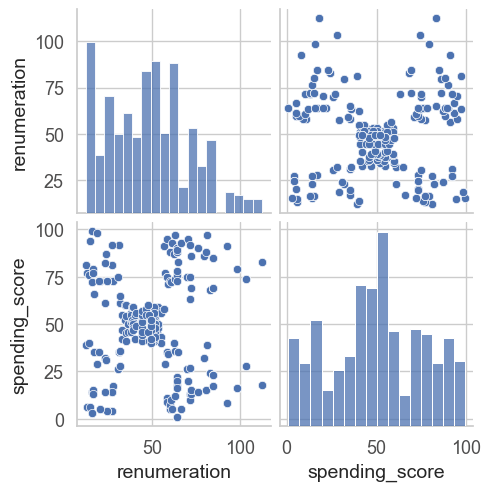

In [287]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)

### Standarise Data before K-clustering.

In [269]:
# Create constant
scaler = StandardScaler()

# Fit the model with the data
scaler.fit(df3)

# standardise the data in the model
scaled_data = scaler.transform(df3)

# View scaled data.
scaled_data

array([[-1.54765751, -0.42164693],
       [-1.54765751,  1.18827772],
       [-1.51218762, -1.68658773],
       ...,
       [ 1.92839126,  1.57159312],
       [ 2.17668045, -1.30327234],
       [ 1.92839126, -1.60992466]])

## Elbow and silhoutte methods

Text(0, 0.5, 'Inertia')

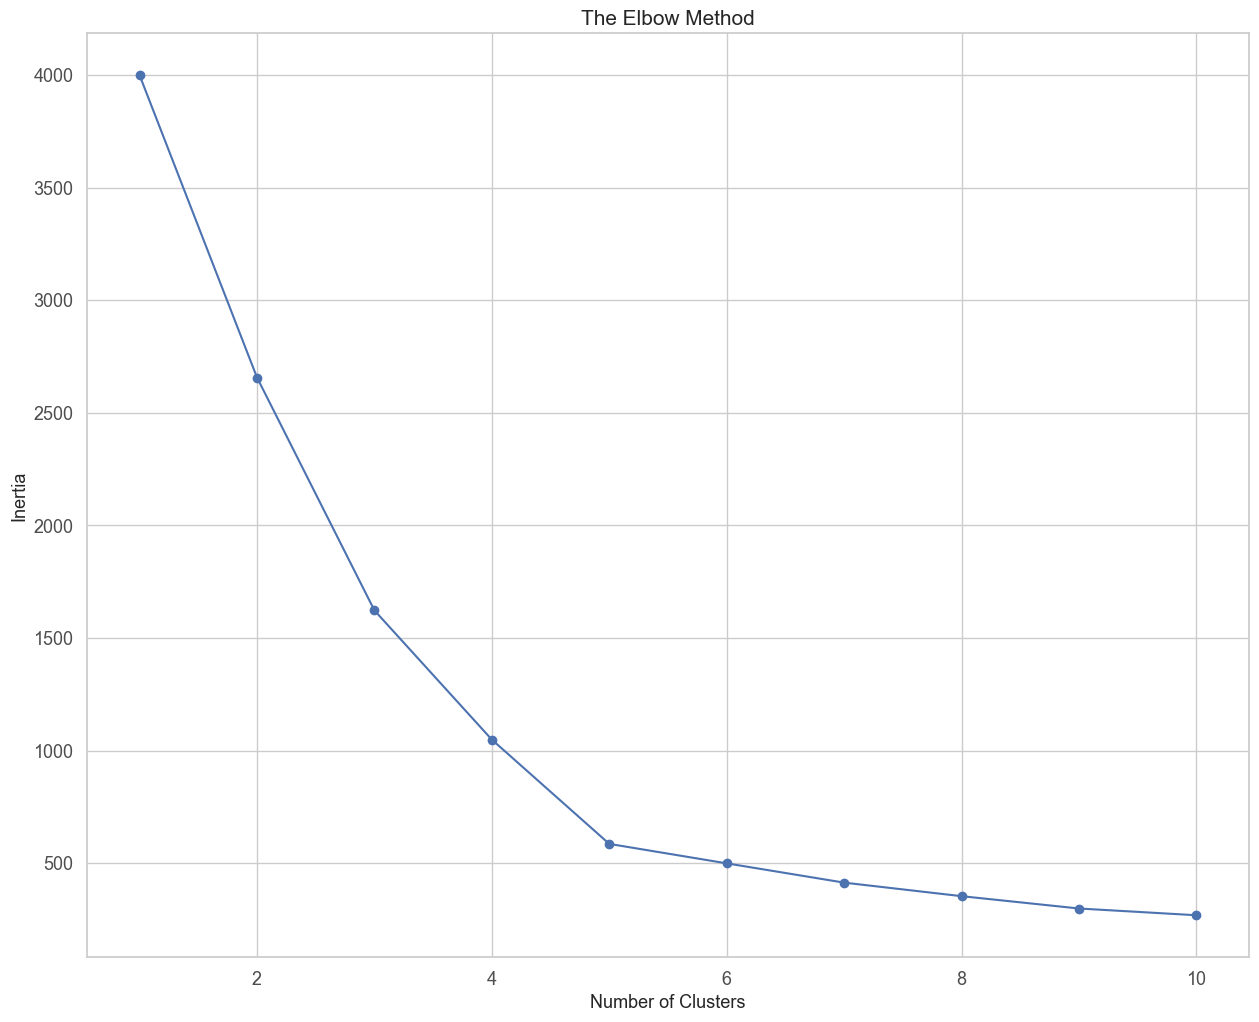

In [289]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(scaled_data)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11), ss, marker='o')

# Insert labels and title.
plt.title("The Elbow Method", size = 15)
plt.xlabel("Number of Clusters", size = 13)
plt.ylabel("Inertia", size = 13)

Text(0, 0.5, 'Sil')

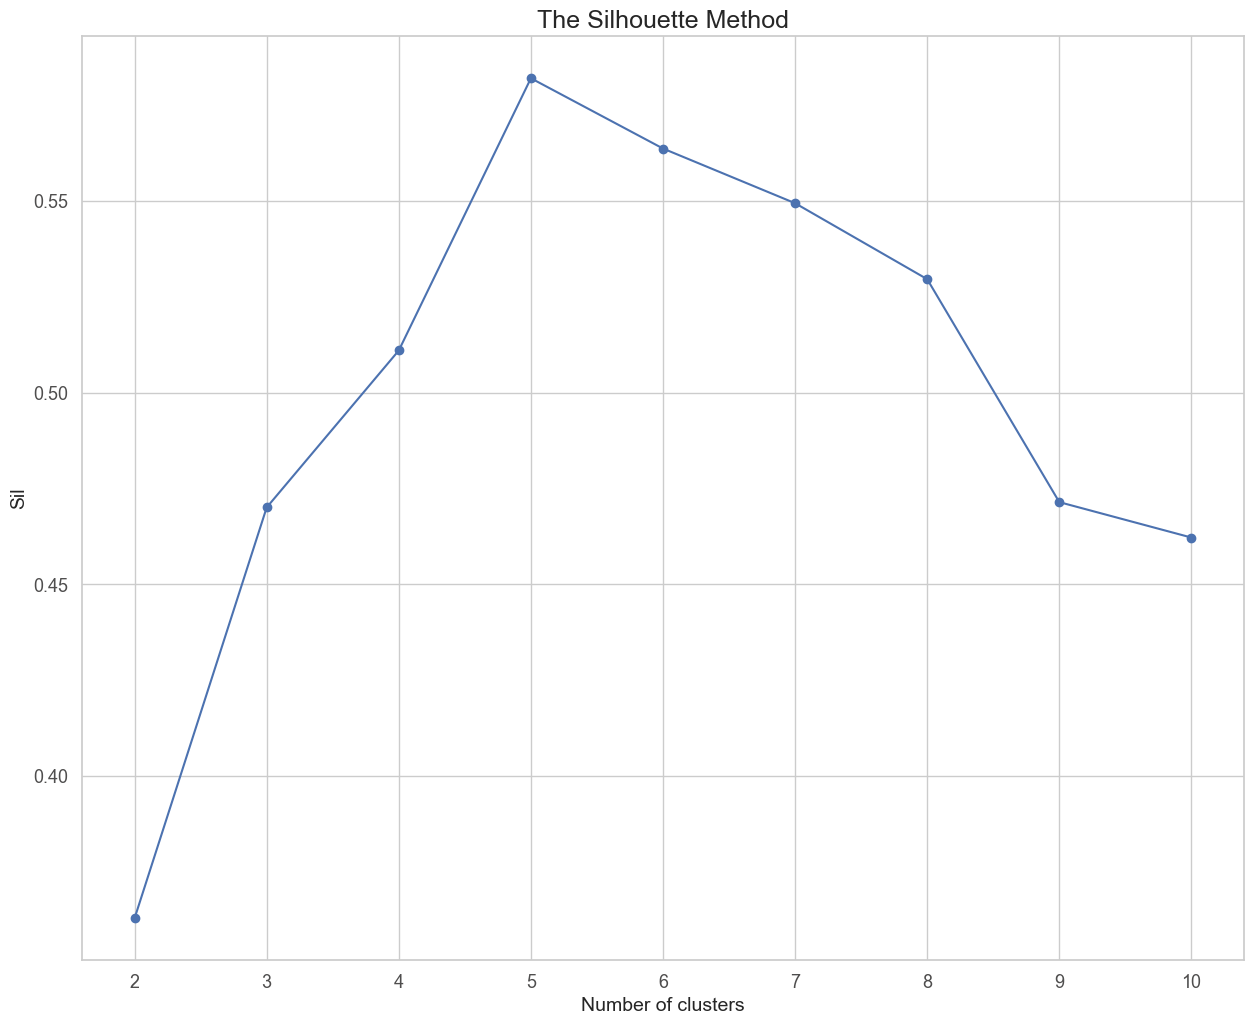

In [290]:
# Determine the number of clusters: Silhouette method.
sil = []
k_max = 10

for k in range(2, k_max+1):
    kmeans_s = KMeans(n_clusters=k).fit(scaled_data)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(scaled_data, 
                                labels, 
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, k_max+1), sil, marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

Both the Elbow and Silhoutte method confirm that the optimal number of clusters seems to be 5 as we glimpse as well in the scatterplot and pairplot, previously.

## Evaluate k-means model at different values of *k*

In [330]:
def k_clusters_n(df, k_value):
    
    # Use k_value to fit the model
    kmeans = KMeans(n_clusters = k_value, max_iter = 300, 
                    init = 'k-means++', random_state = 42).fit(df)
    
    # Assign the kmeans.labels_ to the new cluster column in original dataframe
    df3['cluster'] = kmeans.labels_
    
    # Plot the predicted clusters
    sns.scatterplot(data = df3, x = 'spending_score', y = 'renumeration',
                    style = 'cluster', hue = 'cluster', s = 120, palette = 'tab10')
    plt.xlabel('Spending Score', size = 13)
    plt.ylabel('Remuneration', size = 13)
    plt.title('Possible k-Clusters', size = 15)

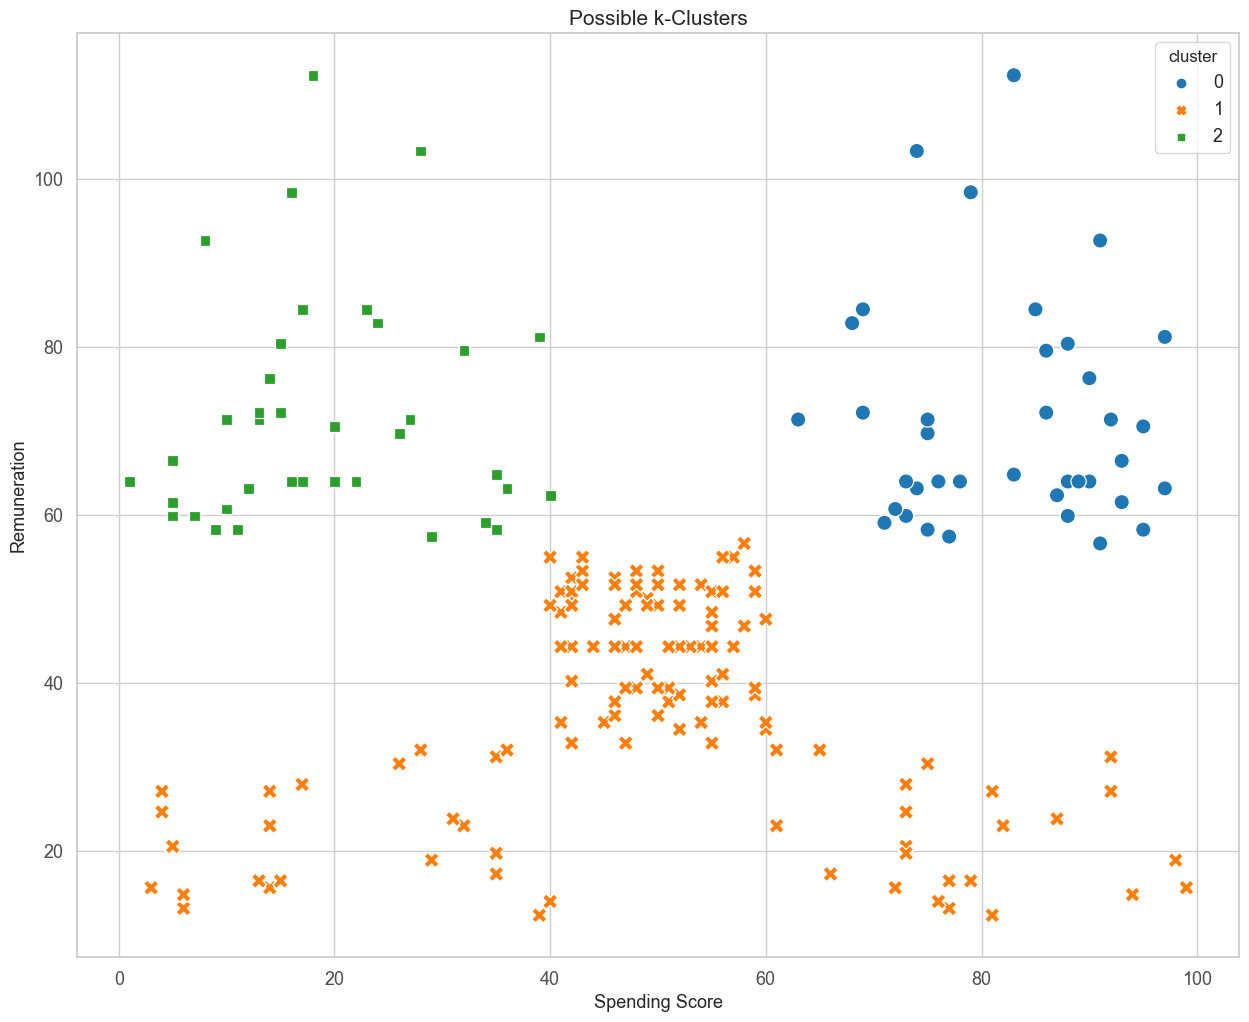

In [331]:
# 3 k-clusters:
k_clusters_n(scaled_data, 3)

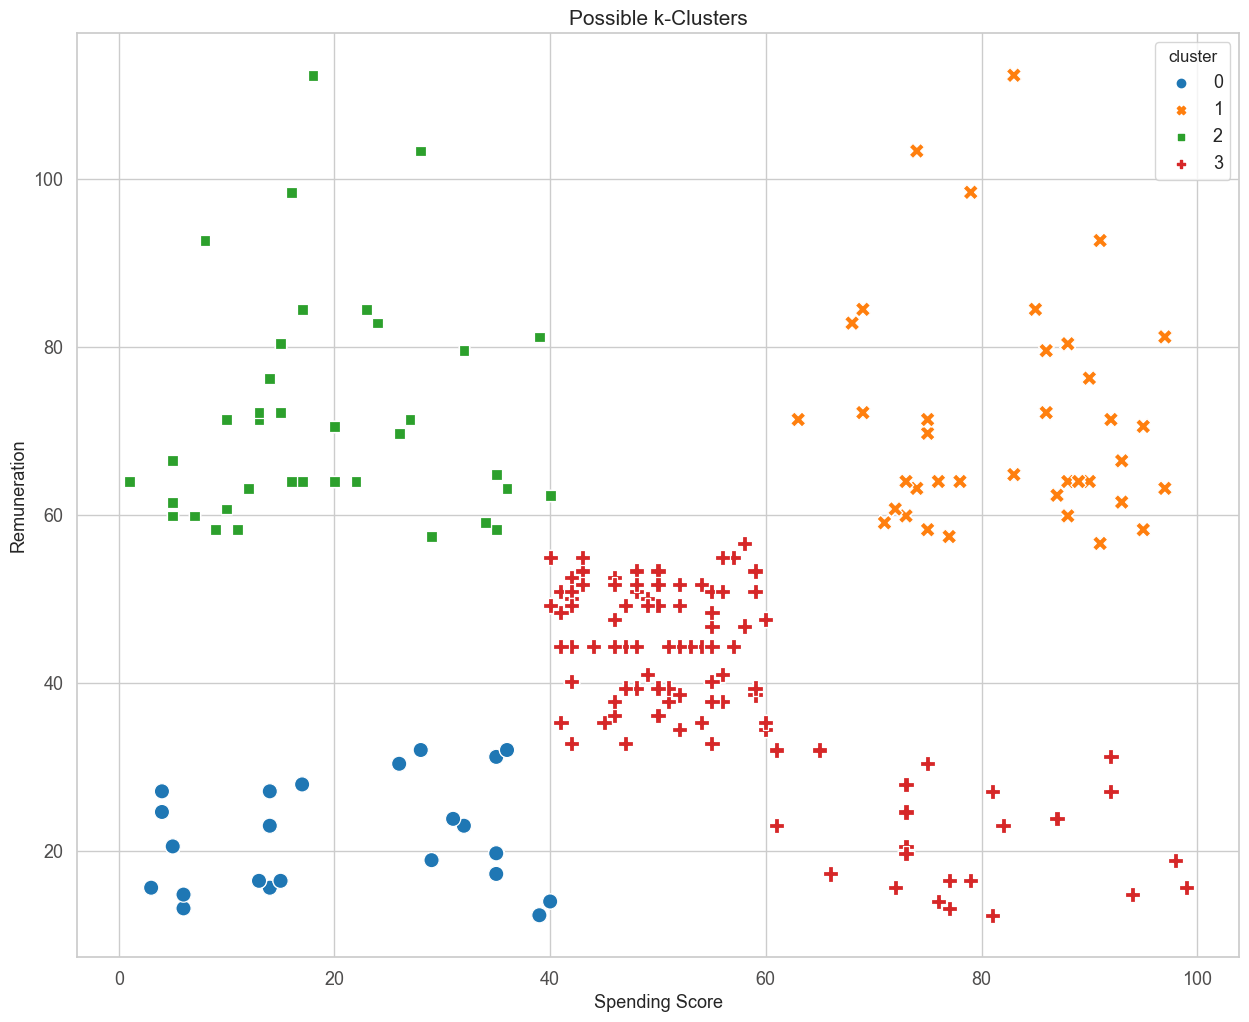

In [332]:
# 4 k-clusters:
k_clusters_n(scaled_data, 4)

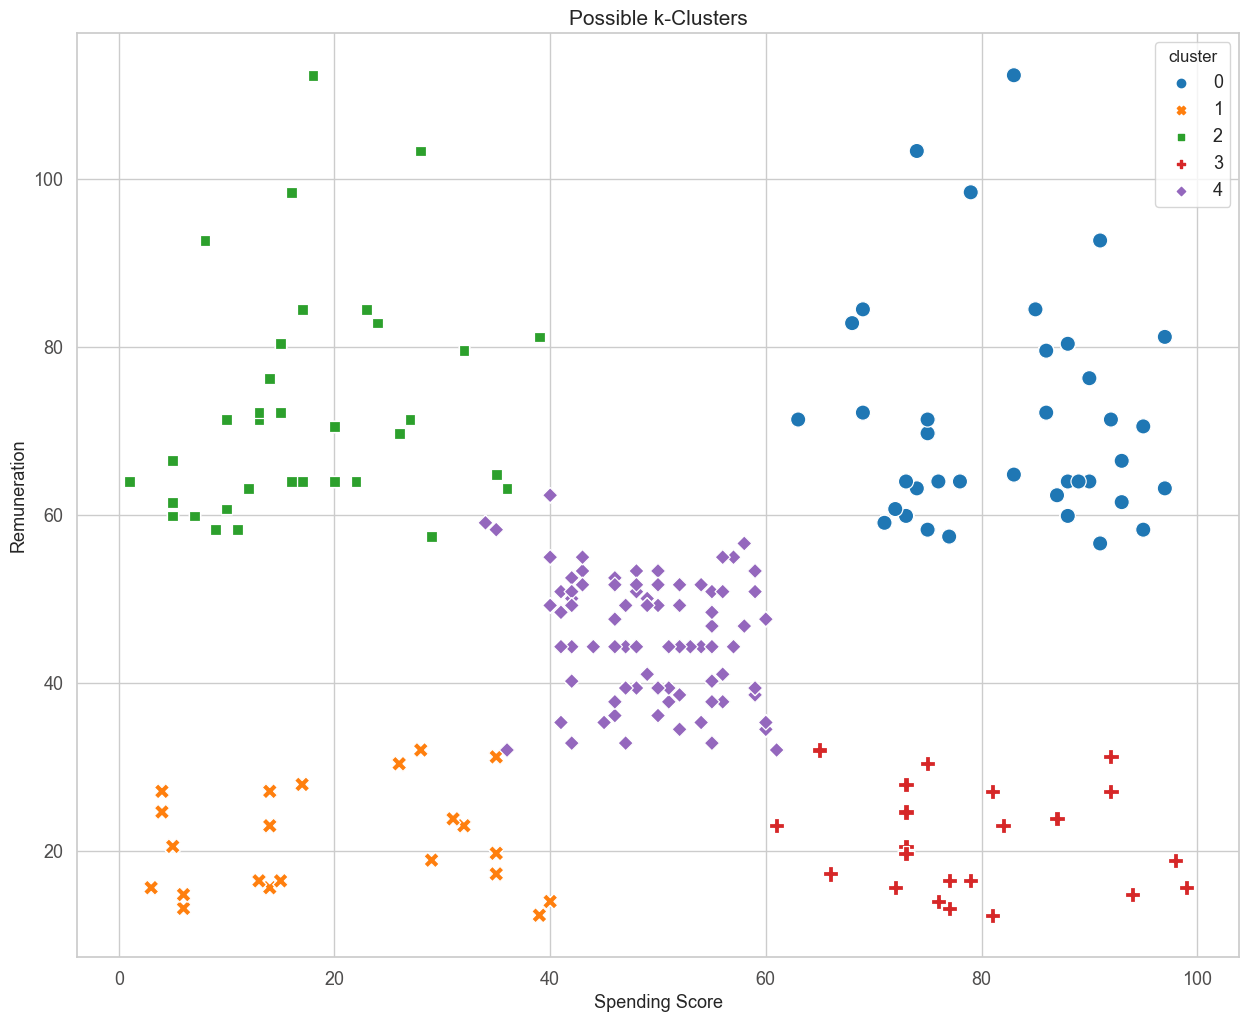

In [333]:
# 5 k-clusters:
k_clusters_n(scaled_data, 5)

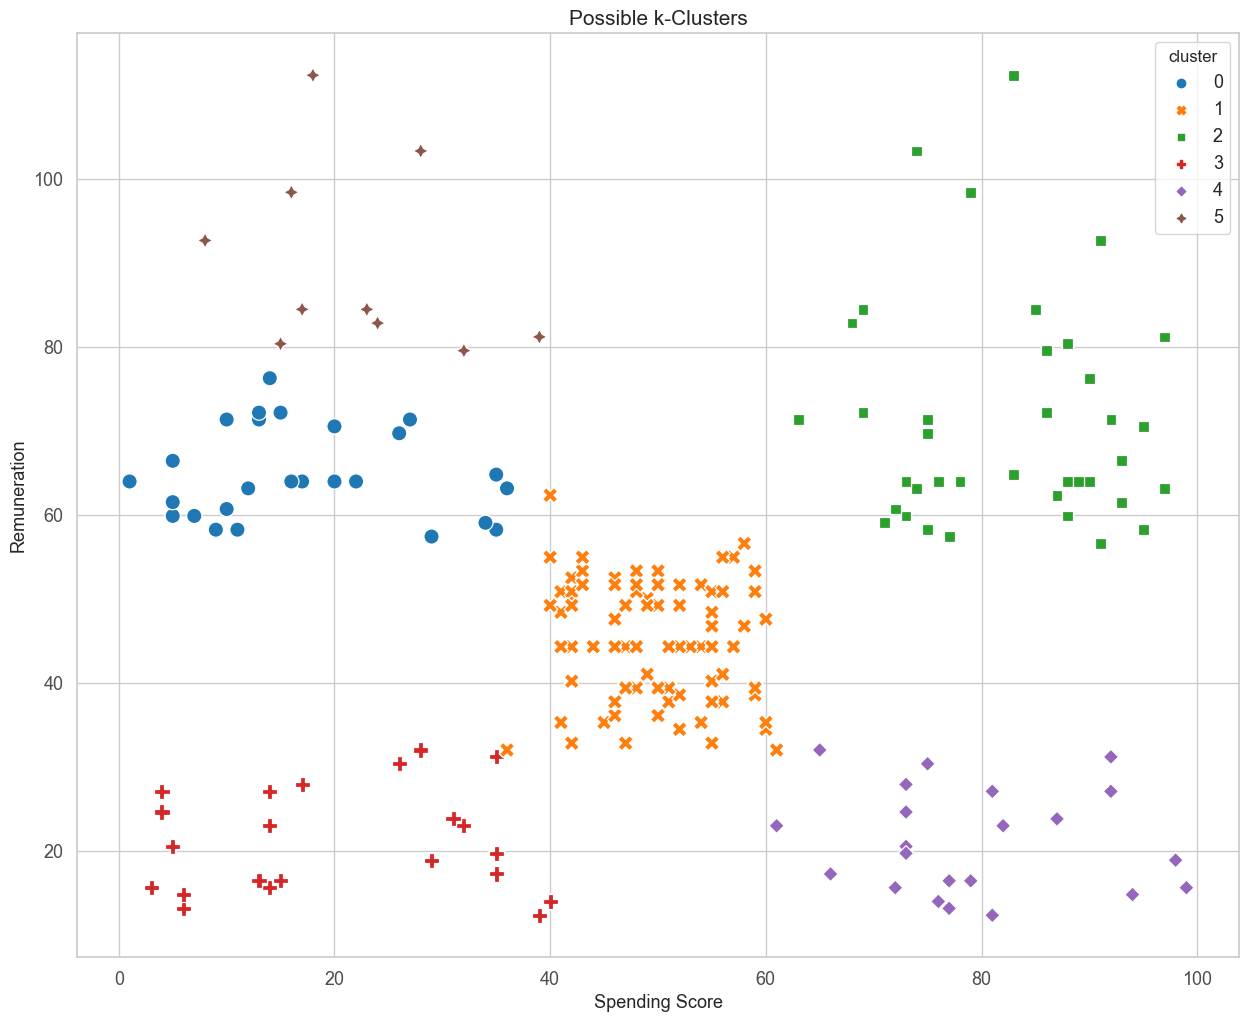

In [334]:
# 6 k-clusters:
k_clusters_n(scaled_data, 6)

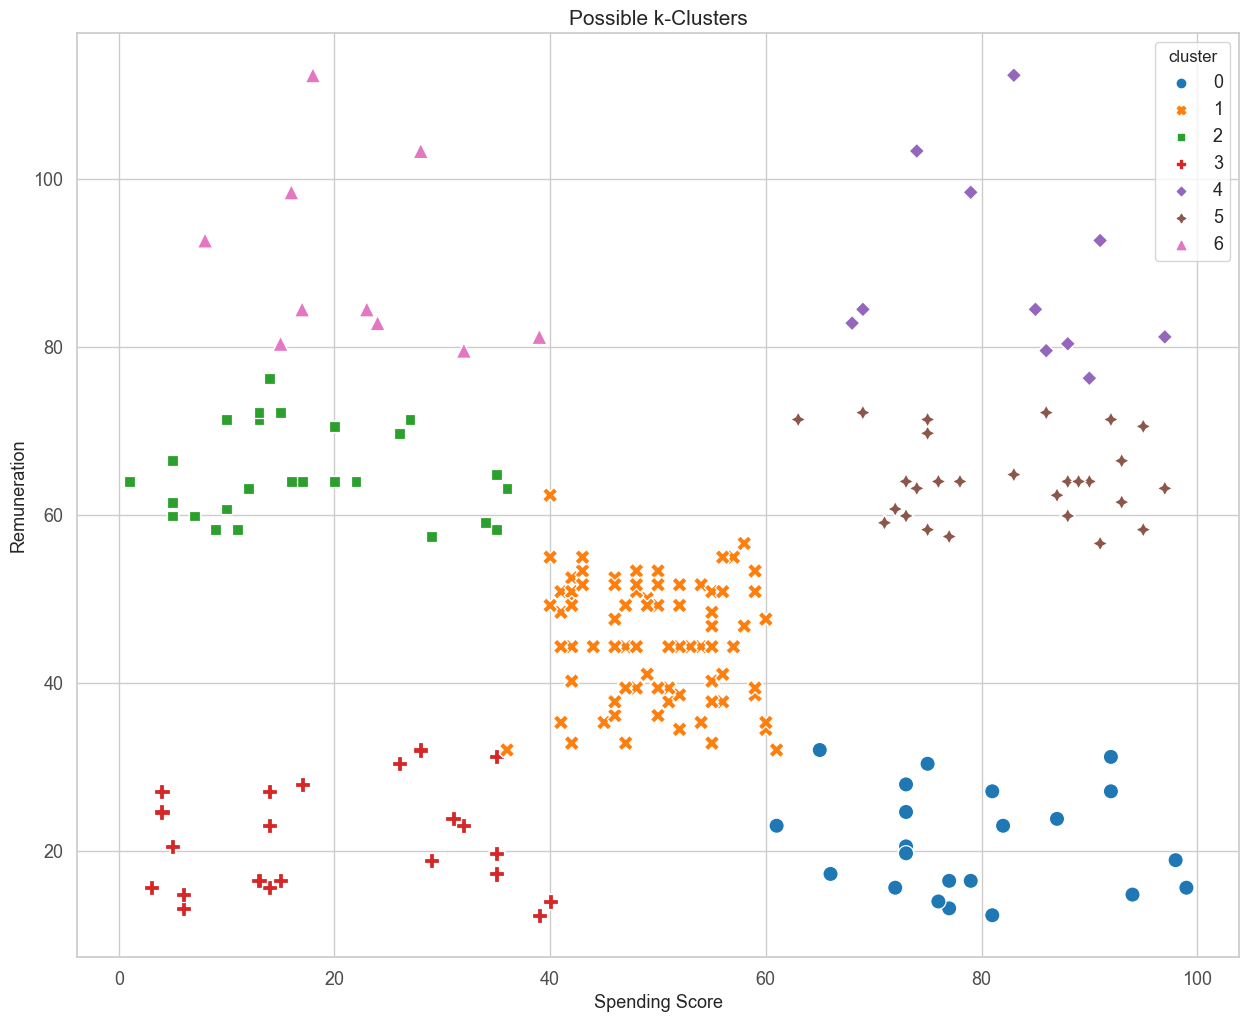

In [335]:
# 7 k-clusters:
k_clusters_n(scaled_data, 7)

Plotting the various k-clusters solutions we can see that 5 k-clusters are pretty representative of various demographics without over-clustering as 3 and 4 k-clusters oversimplify costumers' behaviour and spending habits while 6 and 7 k-clusters are superflous to the analysis. 

In [340]:
# Apply the final model: 5 k-clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 300, init = 'k-means++', random_state = 42).fit(scaled_data)

# Assign the kmeans.labels_ to the new cluster column in dataframe
df3['cluster'] = kmeans.labels_

In [339]:
# Check the number of observations per predicted class.
df3['cluster'].value_counts()

cluster
4    774
0    356
2    330
1    271
3    269
Name: count, dtype: int64

In [344]:
# Adding the clusters to the full clean dataframe
reviews_cl = pd.read_csv('turtle_reviews_cleaned.csv')
reviews_cl

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [346]:
reviews_cl['cluster'] = df3['cluster']
reviews_cl

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  cluster  
0     The fact that 50% of this space is wasted on a...        1  
1     Another worthless Dungeon Master's screen from...        3  
2                       pretty, but also pretty useless        1  
3                                            Five Stars        3  
4                                            Money trap        1  
...                                                 ...      ...  
1995     The perfect word game for mixed ages (with Mom        0  
1996                                          Super fun        2  
1997                                         Great Game        0  
1998                                         Four Stars        2  
1999                                     Love this game        2  

[2000 rows x 10 columns]

<Axes: xlabel='spending_score', ylabel='renumeration'>

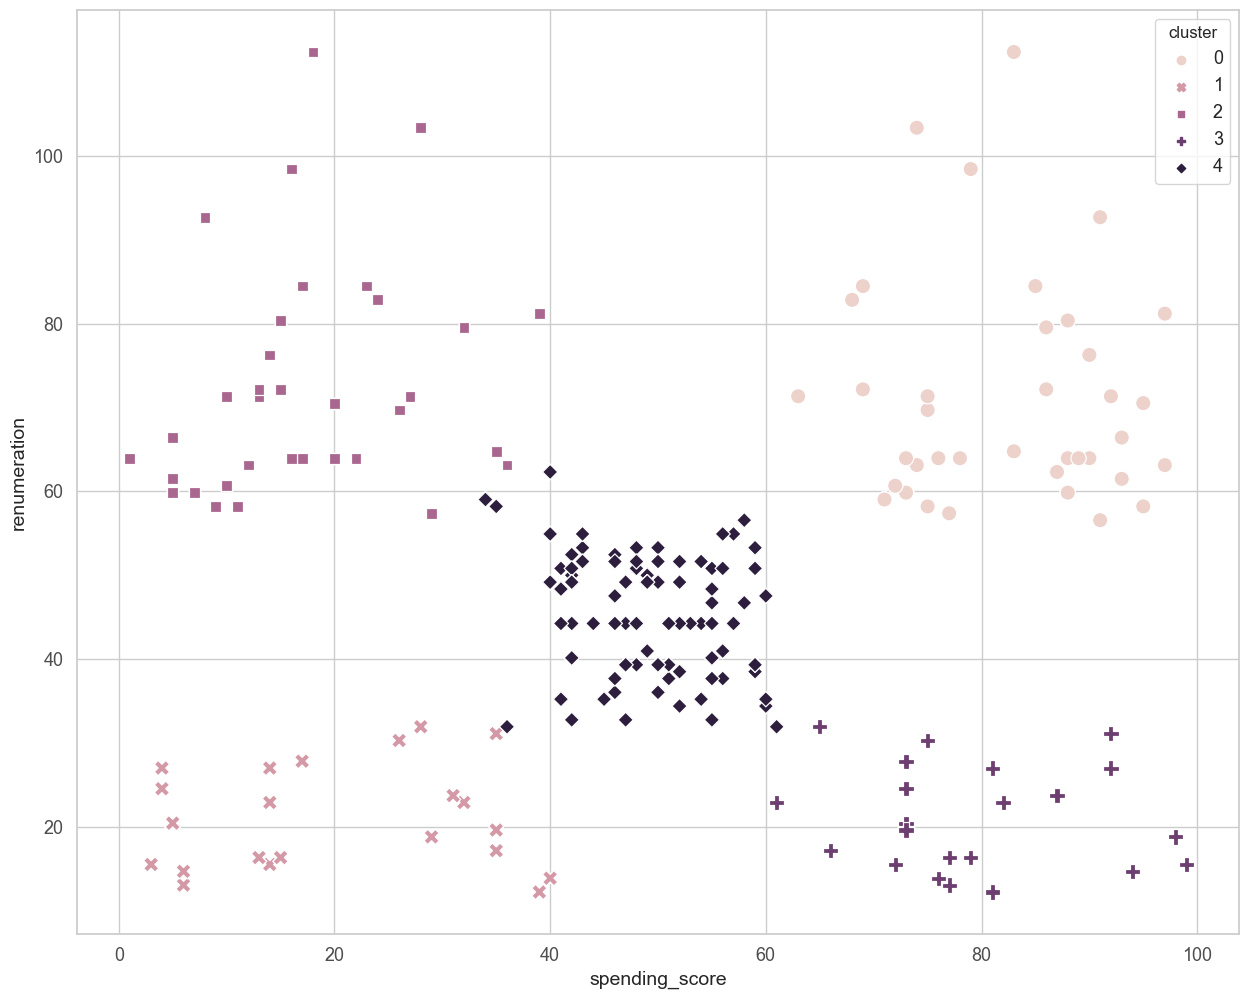

In [513]:
# Understanding the Clusters:
sns.scatterplot(data = df3, x = 'spending_score', y = 'renumeration',
                    style = 'cluster', hue = 'cluster', s=120)

In [350]:
# Classifying clusters:
cluster_value = {0 : 'high spending_score, high remuneration',
                 1 : 'low spending_score, low remuneration',
                 2 : 'low spending_score, high remuneration',
                 3 : 'high spending_score, low remuneration',
                 4 : 'mid spending_score, mid remuneration'}

# Adding them to complete dataframe.
reviews_cl['classification'] = reviews_cl['cluster'].map(cluster_value)

In [424]:
# Percentage of each classified group:
# Count of each group first
classification_count = reviews_cl['classification'].value_counts().reset_index()

classification_count['percentage'] = round((classification_count['count']/classification_count['count'].sum())*100, 2)
classification_count

classification  count  percentage
0    mid spending_score, mid remuneration    774       38.70
1  high spending_score, high remuneration    356       17.80
2   low spending_score, high remuneration    330       16.50
3    low spending_score, low remuneration    271       13.55
4   high spending_score, low remuneration    269       13.45

## Visualising Clusters and Classification.

Text(0.5, 1.0, 'Percentage of Customer Classification')

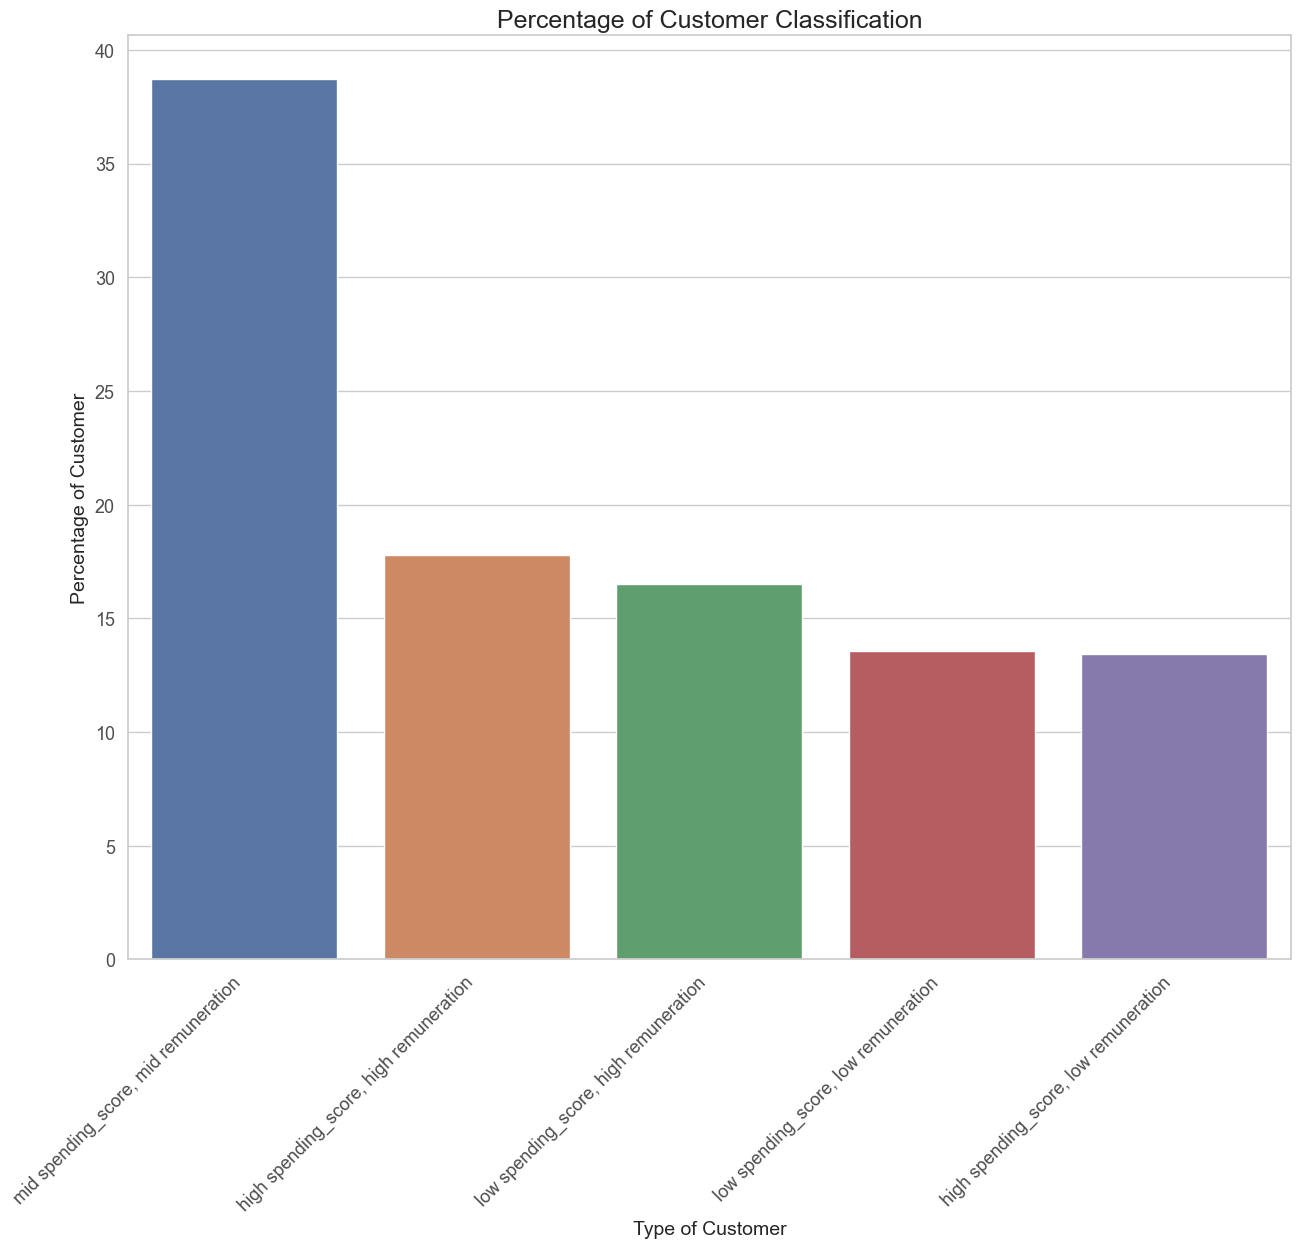

In [426]:
# Visualising percentage of each cluster group:
sns.barplot(data = classification_count, x = 'classification', y = 'percentage')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Type of Customer')
plt.ylabel('Percentage of Customer')
plt.title('Percentage of Customer Classification')

Text(0.5, 1.0, 'Classified Customers by Remuneration (£)')

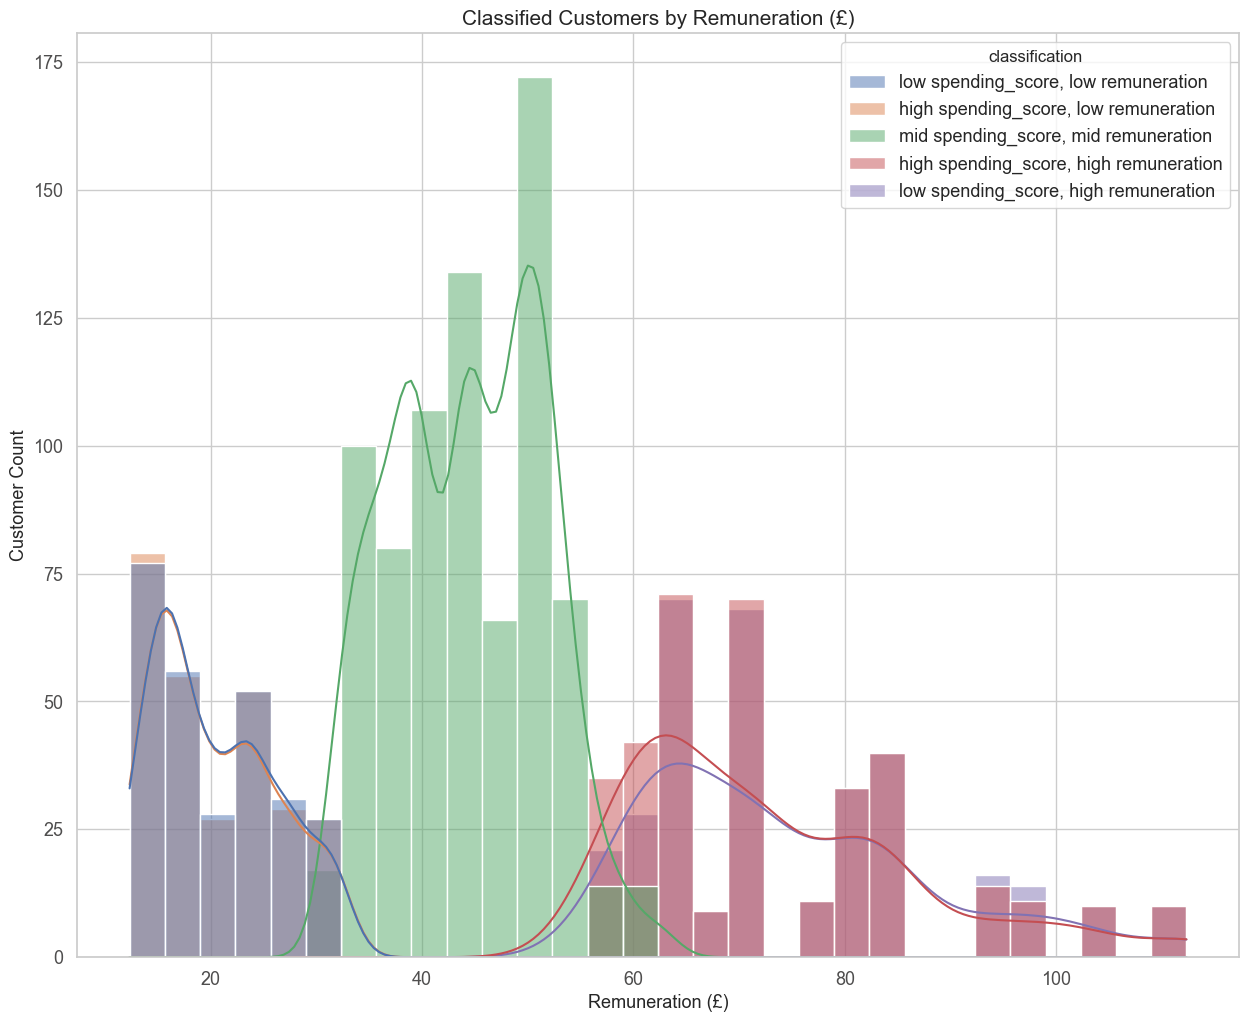

In [355]:
# Visualising the clusters by remuneration:
# Histogram:
sns.histplot(data = reviews_cl, x= 'renumeration', hue = 'classification', bins=30, kde=True)
plt.xlabel(r'Remuneration (£)', size = 13)
plt.ylabel(r'Customer Count', size = 13)
plt.title('Classified Customers by Remuneration (£)', size = 15)

Text(0.5, 1.0, 'Classified Customers by Spending Score')

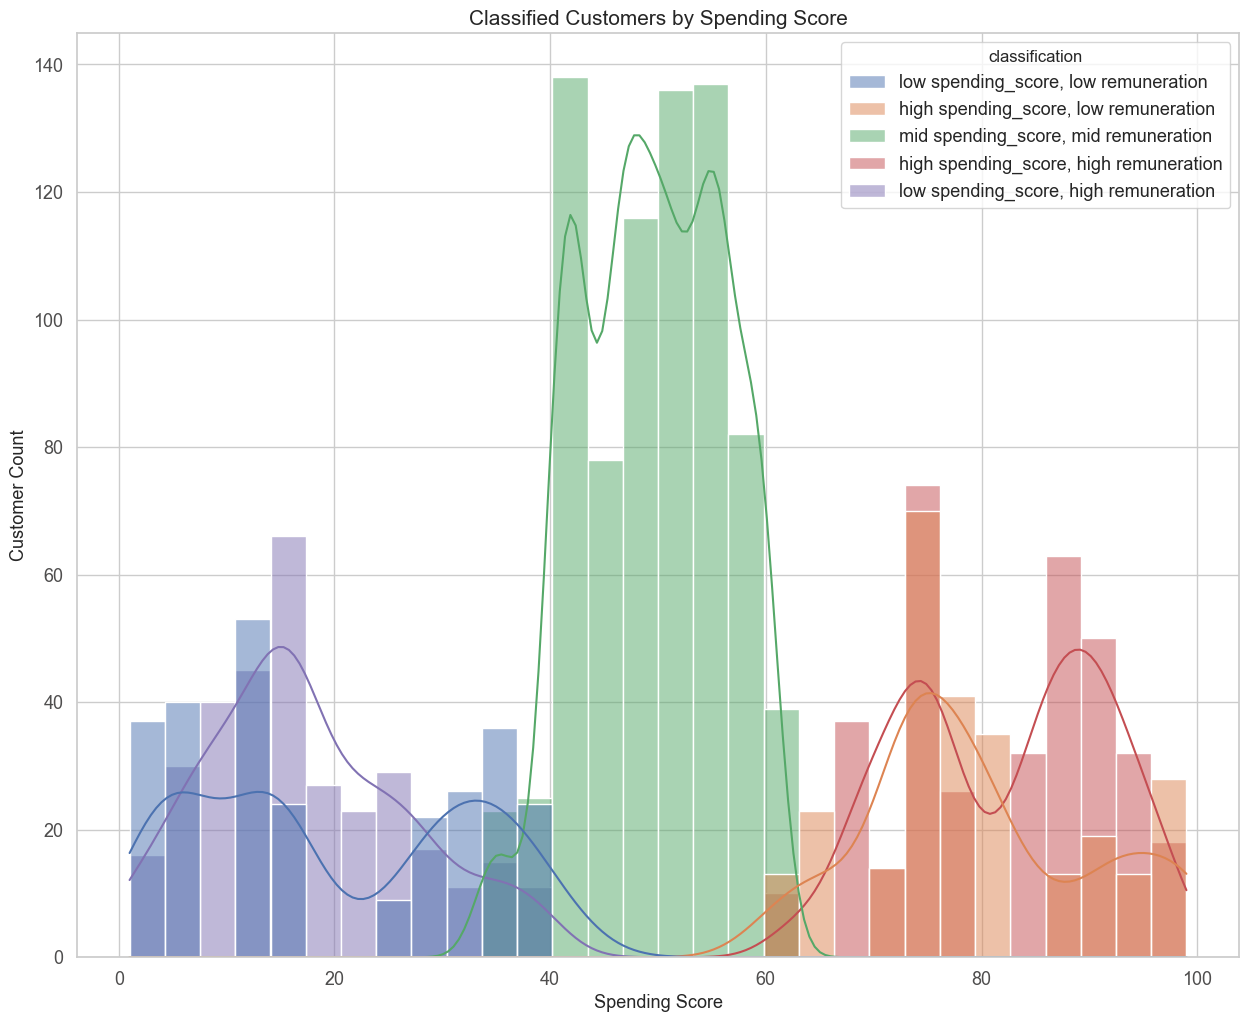

In [354]:
# Visualising the clusters by spending score:
sns.histplot(data = reviews_cl, x= 'spending_score', hue = 'classification', bins=30, kde=True)
plt.xlabel('Spending Score', size = 13)
plt.ylabel('Customer Count', size = 13)
plt.title('Classified Customers by Spending Score', size = 15)

Text(0.5, 1.0, 'Average Loyalty points by Classified Costumer')

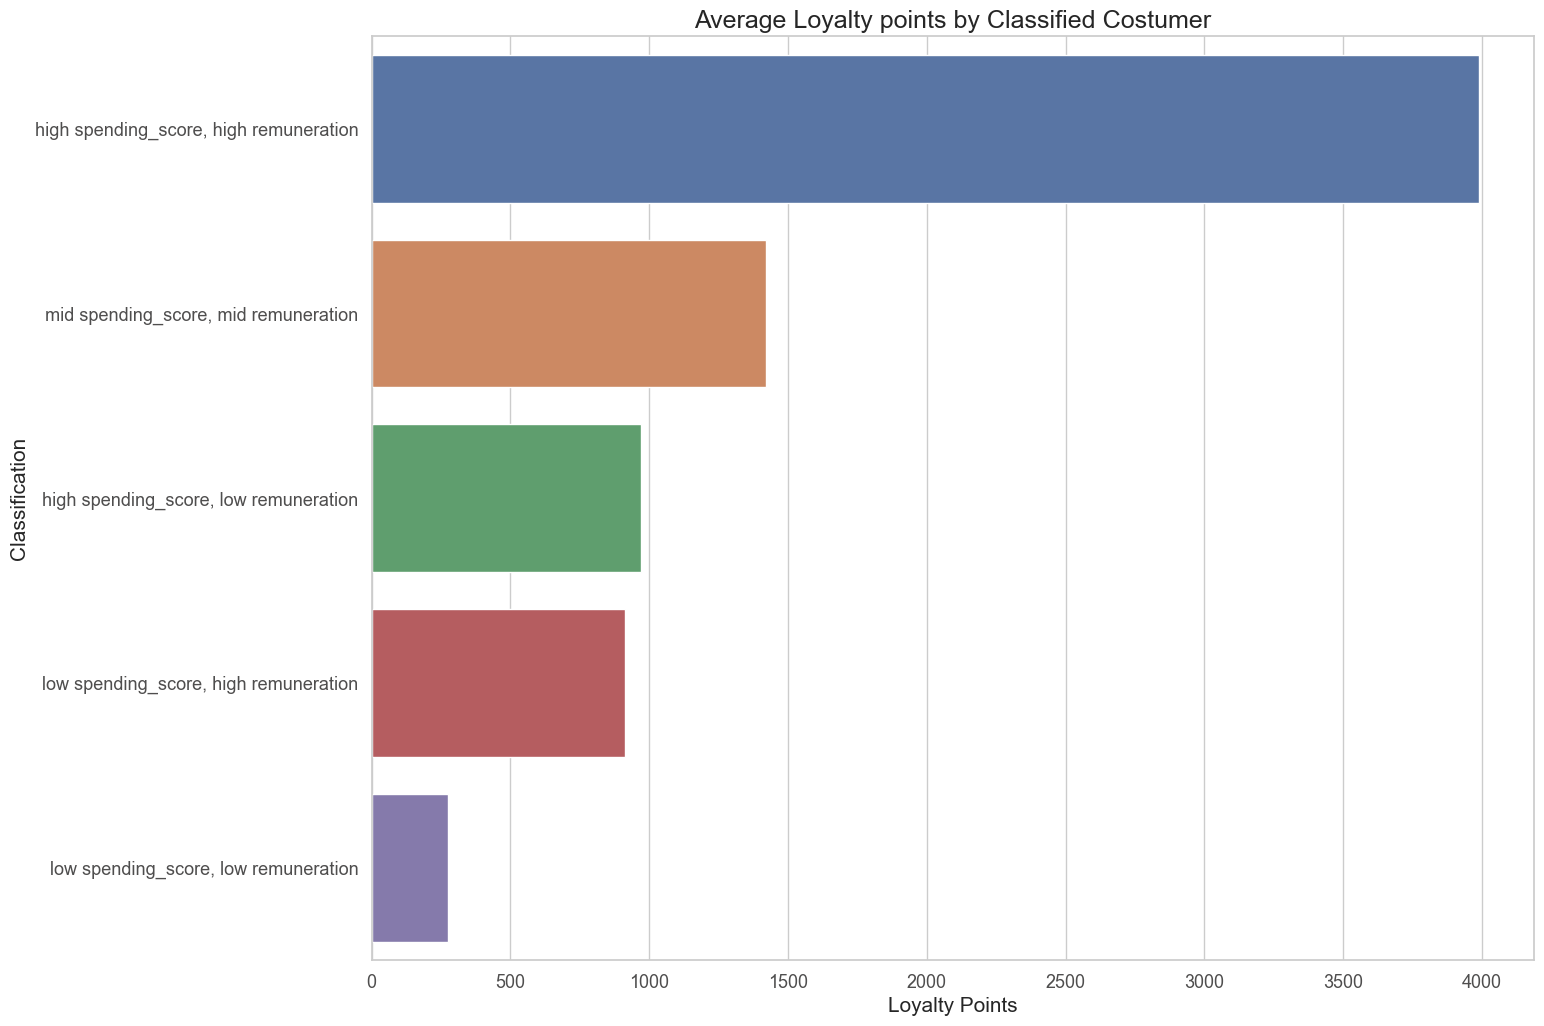

In [380]:
# Loyalty points per classified costumers:
# Barplot:
order = reviews_cl.groupby(["classification"])['loyalty_points'].mean().sort_values(ascending=False).index
sns.barplot(data = reviews_cl, y = 'classification', x = 'loyalty_points', ci = 0, order = order)
plt.xlabel('Loyalty Points', size = 15)
plt.ylabel('Classification', size = 15)
plt.title('Average Loyalty points by Classified Costumer', size = 18)

Text(0.5, 1.0, 'Average Age by Classified Group of Costumers')

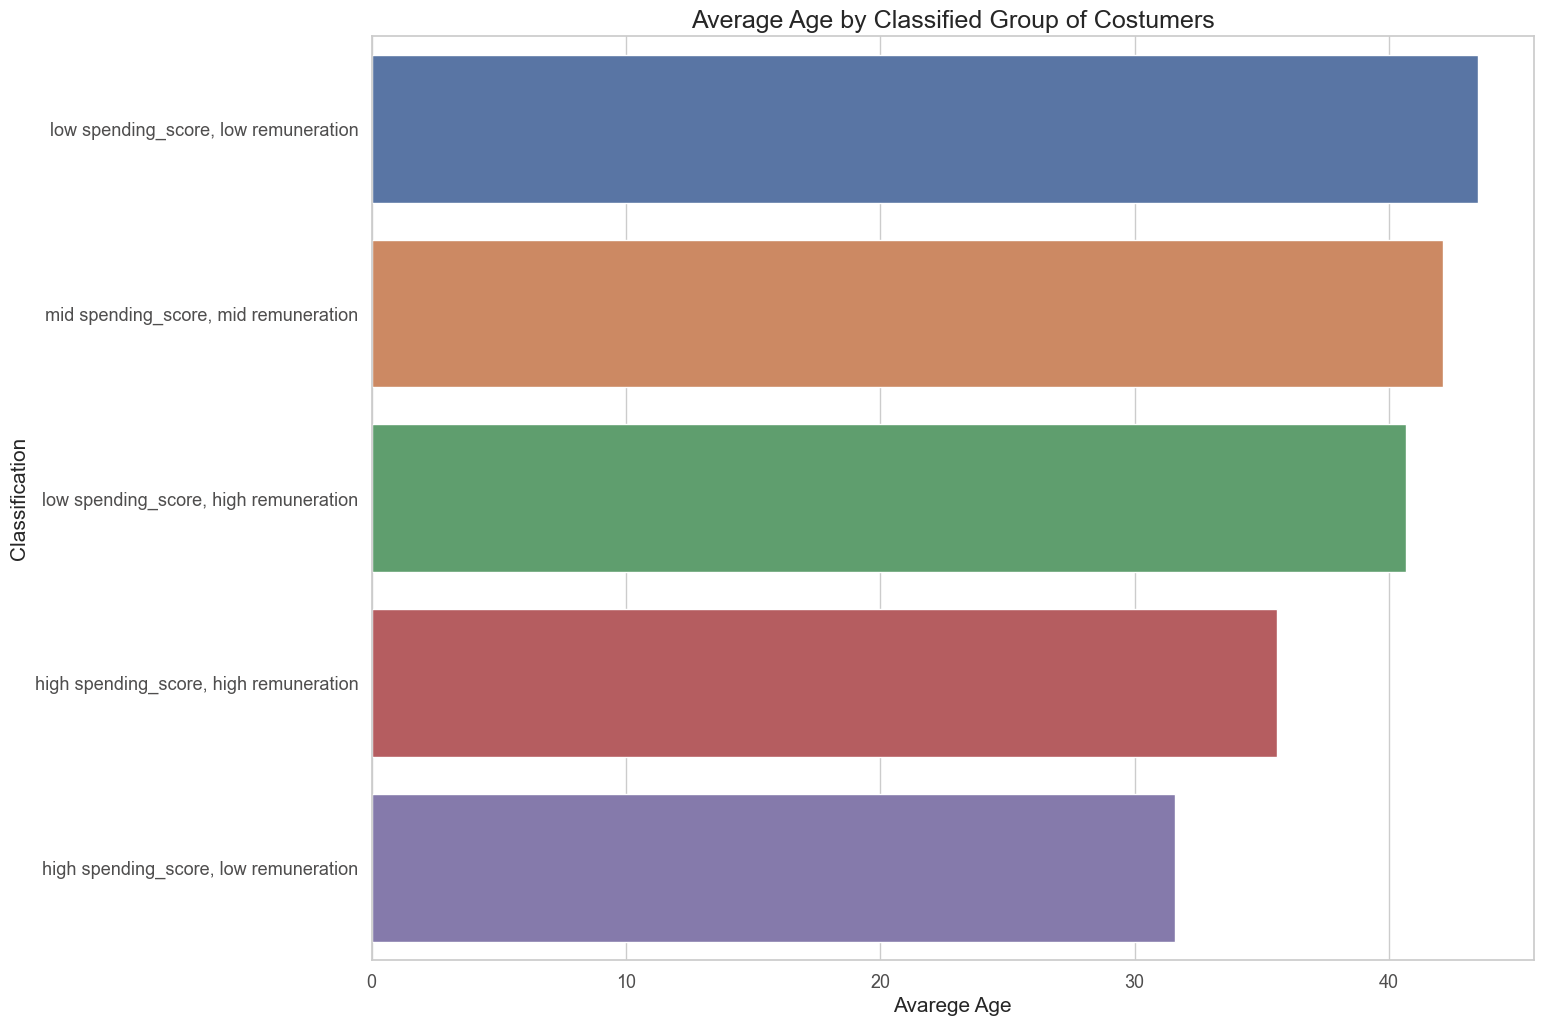

In [384]:
# Average Age per classified Group:
order = reviews_cl.groupby(["classification"])['age'].mean().sort_values(ascending=False).index
sns.barplot(data = reviews_cl, y = 'classification', x = 'age', ci = 0, order = order)
plt.xlabel('Avarege Age', size = 15)
plt.ylabel('Classification', size = 15)
plt.title('Average Age by Classified Group of Costumers', size = 18)

In [416]:
# Group classifications by gender and calculate the mean for loyalty_points,
# age, spending_score & remuneration.
group_classification_gender = reviews_cl.groupby(['classification','gender']) \
                              [['loyalty_points','age', 'spending_score', 'renumeration']].mean().round(2) \
                              .reset_index()

group_classification_gender

classification  gender  loyalty_points    age  \
0  high spending_score, high remuneration  Female         3955.59  34.99   
1  high spending_score, high remuneration    Male         4028.24  36.33   
2   high spending_score, low remuneration  Female          976.90  31.03   
3   high spending_score, low remuneration    Male          965.60  32.34   
4   low spending_score, high remuneration  Female         1127.29  41.99   
5   low spending_score, high remuneration    Male          716.17  39.47   
6    low spending_score, low remuneration  Female          308.61  41.97   
7    low spending_score, low remuneration    Male          218.59  46.09   
8    mid spending_score, mid remuneration  Female         1437.34  40.70   
9    mid spending_score, mid remuneration    Male         1397.33  44.08   

   spending_score  renumeration  
0           81.29         73.41  
1           82.89         73.03  
2           80.48         20.09  
3           78.05         20.69  
4           20.96         76.52  
5           14.21         73.30  
6           20.36         21.27  
7           18.76         19.01  
8           49.19         44.65  
9           50.00         44.10

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'low spending_score, low remuneration'),
  Text(1, 0, 'high spending_score, low remuneration'),
  Text(2, 0, 'mid spending_score, mid remuneration'),
  Text(3, 0, 'high spending_score, high remuneration'),
  Text(4, 0, 'low spending_score, high remuneration')])

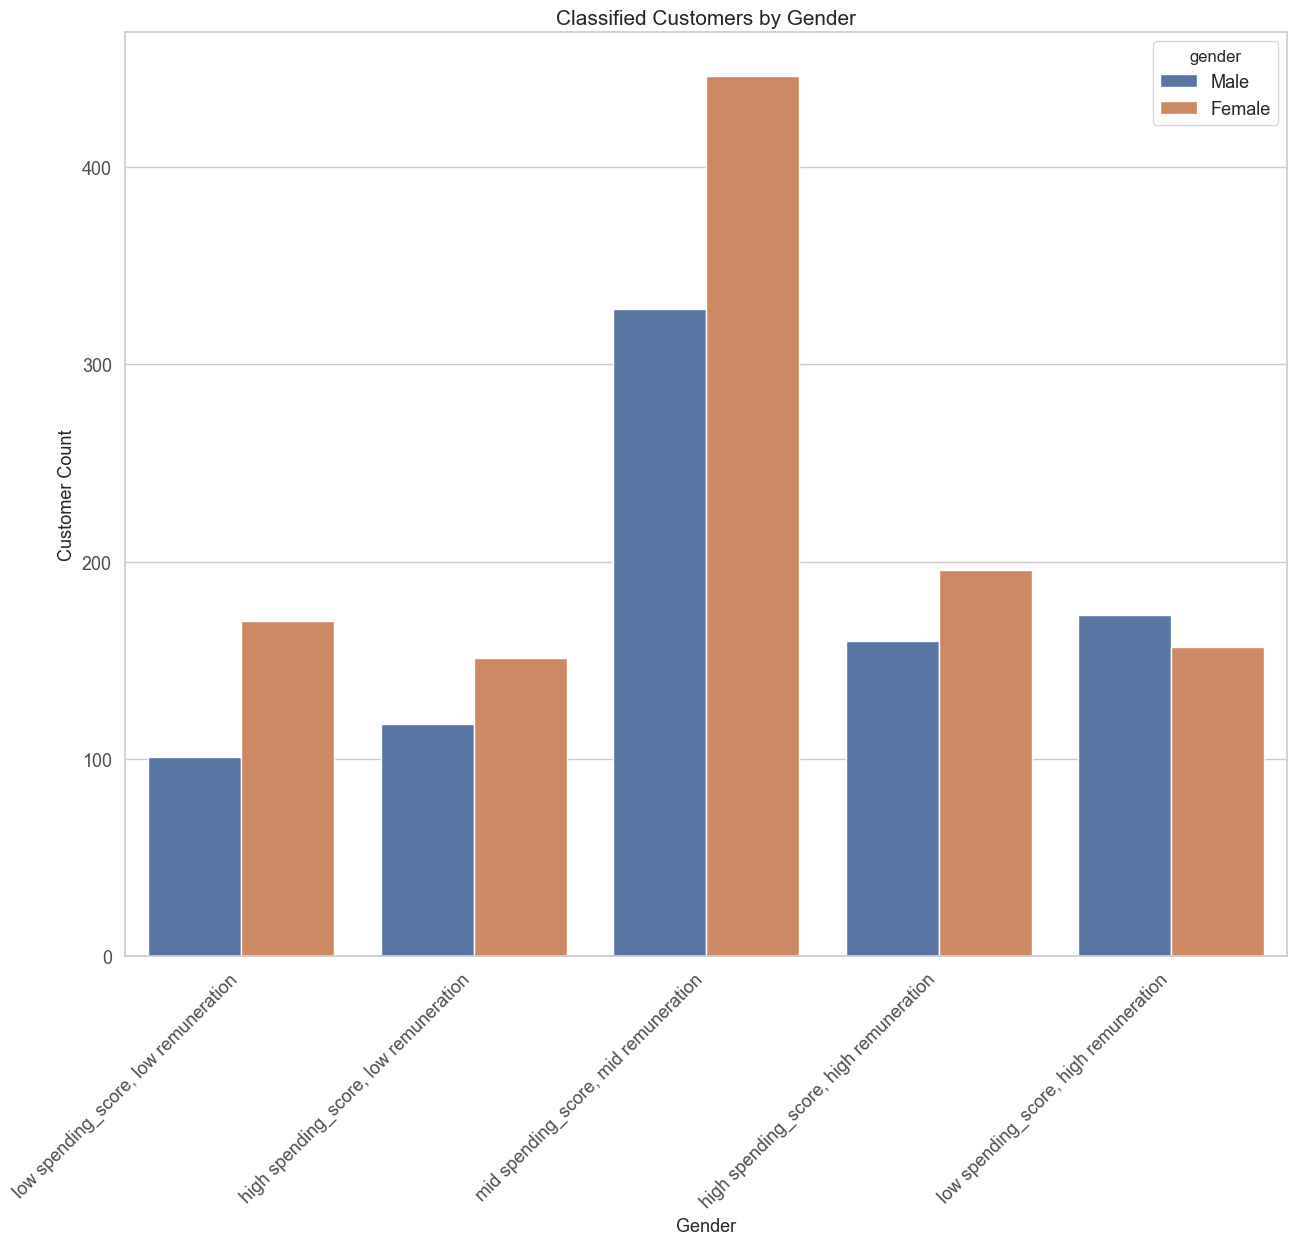

In [414]:
# Gender per classified group:
sns.countplot(data = reviews_cl, x = 'classification', hue = 'gender')
plt.xlabel('Gender', size = 13)
plt.ylabel('Customer Count', size = 13)
plt.title('Classified Customers by Gender', size = 15)
plt.xticks(rotation = 45, ha = 'right')

In [404]:
# Classified group of costumer and educational background.
group_classification_education = reviews_cl.groupby(['classification','education']) \
                       [['loyalty_points','age', 'spending_score', 'renumeration']].mean().round(2) \
                       .reset_index()

group_classification_education

classification     education  loyalty_points  \
0   high spending_score, high remuneration         Basic         4278.12   
1   high spending_score, high remuneration           PhD         4301.07   
2   high spending_score, high remuneration       diploma         3728.30   
3   high spending_score, high remuneration      graduate         3949.64   
4   high spending_score, high remuneration  postgraduate         3829.92   
5    high spending_score, low remuneration         Basic          996.00   
6    high spending_score, low remuneration           PhD          991.06   
7    high spending_score, low remuneration       diploma          955.90   
8    high spending_score, low remuneration      graduate          921.51   
9    high spending_score, low remuneration  postgraduate         1076.42   
10   low spending_score, high remuneration         Basic         1361.94   
11   low spending_score, high remuneration           PhD         1094.06   
12   low spending_score, high remuneration       diploma          868.96   
13   low spending_score, high remuneration      graduate          843.77   
14   low spending_score, high remuneration  postgraduate          676.08   
15    low spending_score, low remuneration         Basic          283.00   
16    low spending_score, low remuneration           PhD          248.43   
17    low spending_score, low remuneration       diploma          288.04   
18    low spending_score, low remuneration      graduate          277.73   
19    low spending_score, low remuneration  postgraduate          294.10   
20    mid spending_score, mid remuneration         Basic         1287.64   
21    mid spending_score, mid remuneration           PhD         1416.90   
22    mid spending_score, mid remuneration       diploma         1399.18   
23    mid spending_score, mid remuneration      graduate         1430.19   
24    mid spending_score, mid remuneration  postgraduate         1421.76   

      age  spending_score  renumeration  
0   34.65           89.88         72.16  
1   36.95           77.66         82.05  
2   37.37           73.74         75.62  
3   34.85           83.09         71.80  
4   36.03           84.46         68.15  
5   34.00           73.00         20.50  
6   30.89           79.59         21.44  
7   44.20           75.40         18.86  
8   30.53           78.26         19.85  
9   32.85           82.98         20.47  
10  45.89           27.33         69.79  
11  40.52           19.00         82.14  
12  50.69           16.38         72.73  
13  36.97           17.22         72.58  
14  41.89           13.51         70.53  
15  49.00           17.33         20.23  
16  46.54           15.88         22.61  
17  48.67           18.02         20.66  
18  38.98           22.03         19.19  
19  44.38           22.15         20.08  
20  45.82           47.09         37.72  
21  43.01           49.49         45.56  
22  50.51           48.66         40.87  
23  39.67           49.14         45.20  
24  42.31           50.88         43.76

Text(0.5, 1.0, 'Educational Background for each Classification of Costumers')

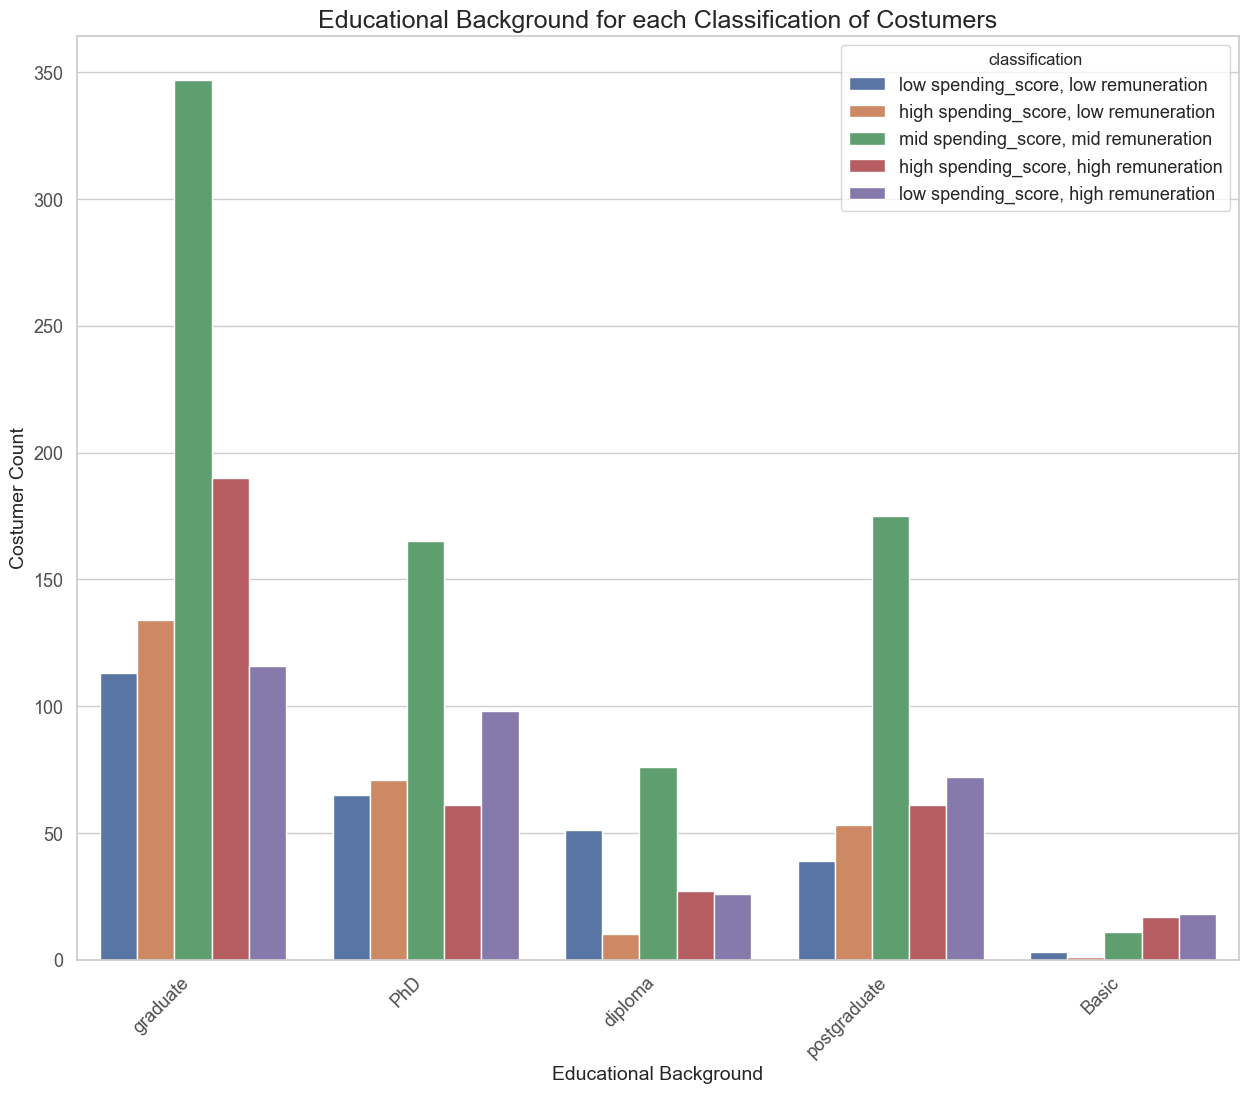

In [418]:
# Visualisation: Countplot.
sns.countplot(data = reviews_cl, x = 'education', hue = 'classification')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Educational Background')
plt.ylabel('Costumer Count')
plt.title('Educational Background for each Classification of Costumers')

## Insights and observations


### Observations by Group:

#### Group 1: low spending, low remuneration:
* Group represents only 13.55% of the sample data making it the second least populated classification.
* Slightly above the averagee age of the sample data (the general average being 39.5 and this group is 43.5)
* As the least spending classification and remuneration, it also has the least amount of loyalty points collected.

It is not a category of incredible interest for marketing purposes as it spends within their means and would not generate major new sales, as it is not populated enough it does not warrant a targeted campaing to consolidate loyalty or new revenue.

#### Group 2: high spending, low remuneration:
* Least populated catergory with 13.45% of the total customers.
* It is the youngest category with an average age not reaching 32 years old.
* It is third in loyalty points collected.

Even as the least populated category it represents a good chunk of loyalty points. While the monetary means are more limited the group is more susceptible to marketed campaigns or reduced prices as it shows inclination of bigger spendings in comparison to the previous group. 

#### Group 3: mid spending, mid remuneration:
* It is the most populated category making around 38.7% of the whole sampled data.
* it is the second highest for loyalty points. 
* An average age just slightly above the general average (42 years old vs 39.5)

Being the most populated category with an high spending score and loyalty points, it should be heavly taken into consideration for marketing campaigns and targated ads as it should not be ignored at the cost of losing a solid support base.

#### Group 4: low spending score, high remuneration:
* This group represents 16.5% of the sampled data.
* It could represent either occasional players or new ones that have not built up an high spending score.
* The second lowest in terms of loyalty points build up.

While this group has the means for higher spending, it does not produce high levels of economic investment in the products. It does not warrant targeted marketing campaigns but should not be excluded from reduced offers or promotions in order to build customer loyalty.

#### Group 5: high spending score, high remuneration:
* Second most populated category making up 17.8% of the sampled data.
* By far the category with the highest loyalty points collected and spending score.
* Age slightly below general average (roughly 35 years old vs 39.5)

As the category with the highest monetary means and will to spend it, it should always be included in new campaigns as well as targeted for bonus deals and the such to generate more revenue while being careful not to overdo it as to not alienate the loyal customers.

# 

In [428]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
!pip install textblob
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   --------------- ------------------------ 245.8/626.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


In [431]:
# View DataFrame.
reviews_cl

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  cluster  \
0     The fact that 50% of this space is wasted on a...        1   
1     Another worthless Dungeon Master's screen from...        3   
2                       pretty, but also pretty useless        1   
3                                            Five Stars        3   
4                                            Money trap        1   
...                                                 ...      ...   
1995     The perfect word game for mixed ages (with Mom        0   
1996                                          Super fun        2   
1997                                         Great Game        0   
1998                                         Four Stars        2   
1999                                     Love this game        2   

                              classification  
0       low spending_score, low remuneration  
1      high spending_score, low remuneration  
2       low spending_score, low remuneration  
3      high spending_score, low remuneration  
4       low spending_score, low remuneration  
...                                      ...  
1995  high spending_score, high remuneration  
1996   low spending_score, high remuneration  
1997  high spending_score, high remuneration  
1998   low spending_score, high remuneration  
1999   low spending_score, high remuneration  

[2000 rows x 11 columns]

In [432]:
# Keep necessary columns. Drop unnecessary columns.
df_nlp = reviews_cl[['review', 'summary']]

# View DataFrame.
df_nlp

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [434]:
# Determine if there are any missing values.
df_nlp.isna().sum()

review     0
summary    0
dtype: int64

## Prepare the data for NLP
### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [435]:
# Review: Change all to lower case and join with a space.
df_nlp['review'] = df_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_nlp

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*: your unpainted ...   
2     nice art, nice printing. why two panels are fi...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game. did not think i would like it when...   
1997  great game for all......... keeps the mind nim...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [437]:
# Summary: Change all to lower case and join with a space.
df_nlp['summary'] = df_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_nlp

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*: your unpainted ...   
2     nice art, nice printing. why two panels are fi...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game. did not think i would like it when...   
1997  great game for all......... keeps the mind nim...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### Replace punctuation in each of the columns respectively (review and summary)

In [439]:
# Replace all the punctuations in review column.
# function to remove punctuation:
def remove_punct(text):
    punctfree="".join([i for i in text if i not in string.punctuation])
    return punctfree

# Updating review column.
df_nlp['review'] = df_nlp['review'].apply(lambda x:remove_punct(x))

df_nlp

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [441]:
# Replace all the puncuations in summary column.
df_nlp['summary'] = df_nlp['summary'].apply(lambda x:remove_punct(x))
df_nlp

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### Dropping duplicates from both columns

In [444]:
# Drop duplicates in both columns.
nodup_df = df_nlp.drop_duplicates(subset=['review', 'summary'])

# View the datafram
nodup_df.reset_index(inplace=True)
print(nodup_df.shape)
nodup_df

(1961, 3)


index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 3 columns]

## Tokenise and create wordclouds

In [446]:
# Create new DataFrame (copy DataFrame).
no_dup = nodup_df

# View DataFrame.
print(no_dup.info)
no_dup.head()

<bound method DataFrame.info of       index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [447]:
# Apply tokenisation to both columns.
# Tokenise the words in review.
no_dup['tokens_review'] = no_dup['review'].apply(word_tokenize)

# Tokenise words in summary.
no_dup['tokens_summary'] = no_dup['summary'].apply(word_tokenize)

# View DataFrame.
no_dup

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                          tokens_review  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         tokens_summary  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 5 columns]

In [451]:
# Remove alphanumeric characters.
# Review column:
# Create empty list of tokens.
all_tokens_review = []

for i in range(no_dup['tokens_review'].shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + no_dup['tokens_review'][i]

# Filter out tokens that are not alphanumeric (to eliminate punctuation marks, etc.).
tokens_r = [word for word in all_tokens_review if word.isalnum()]

In [454]:
# Summary column:
# Create an empty list of tokens.
all_tokens_summary = []

for i in range(no_dup['tokens_summary'].shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + no_dup['tokens_summary'][i]
tokens_s = [word for word in all_tokens_summary if word.isalnum()]

In [458]:
# Remove stop words from both columns:
# Create a set of English stop words.
stop_words = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words: review column.
tokens_r = [x for x in tokens_r if x.lower() not in english_stopwords]
tokens_s = [x for x in tokens_s if x.lower() not in english_stopwords]

In [459]:
# Review: Create a word cloud.
# Define an empty string variable.
tokens_string = ''

for value in tokens_r:
    # Add each filtered token word to the string.
    tokens_string = tokens_string + value + ' '

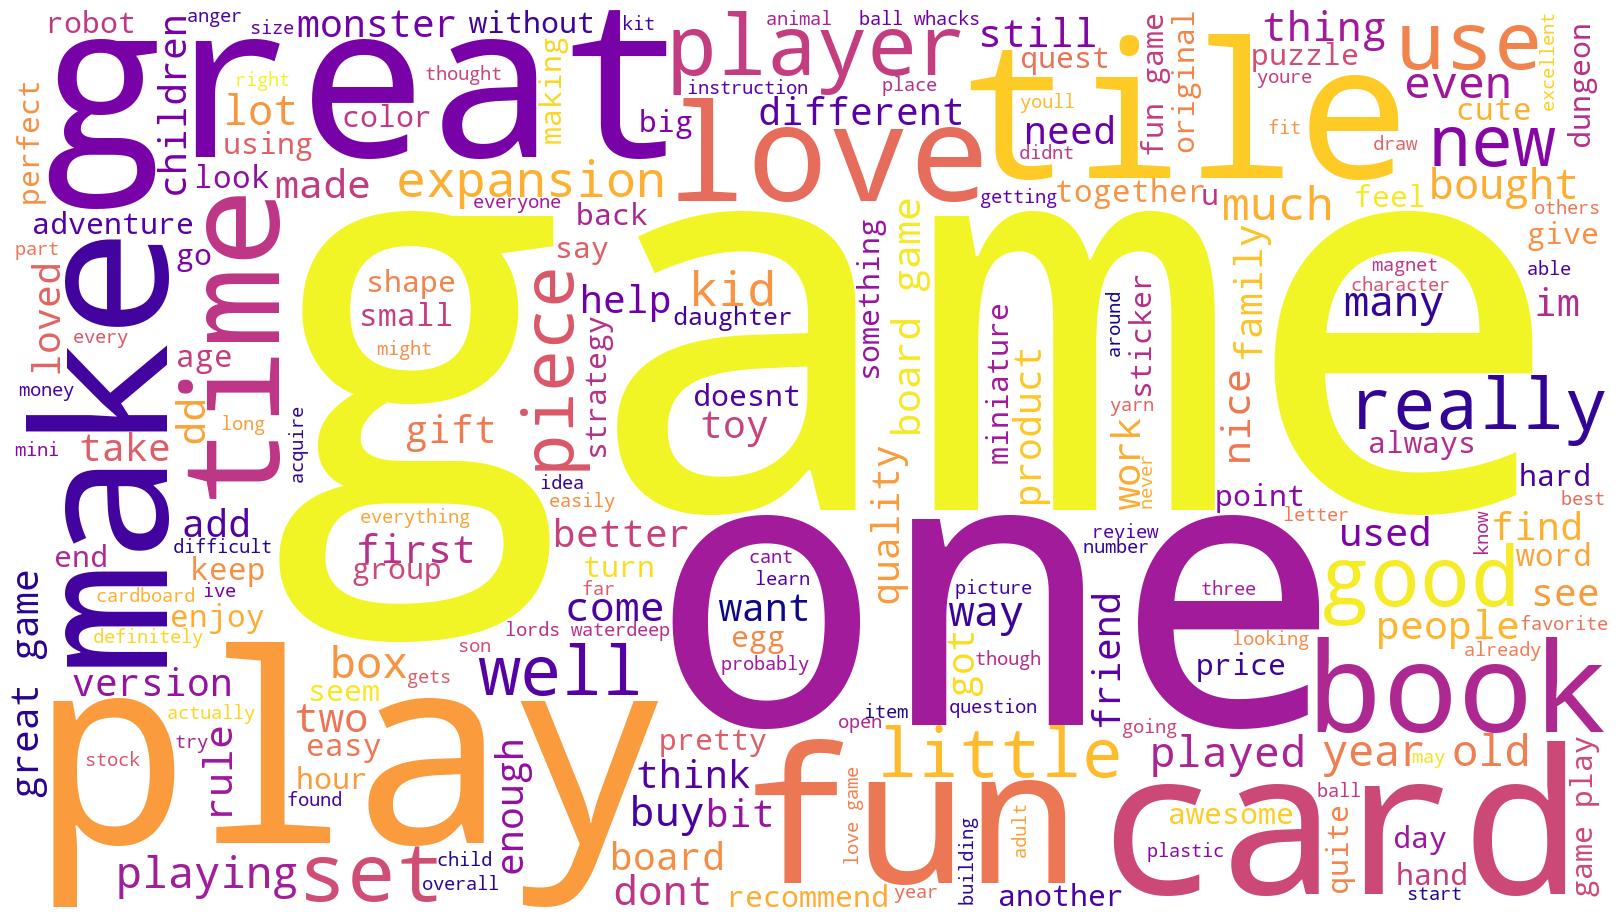

In [460]:
# Review: Plot the WordCloud image.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [461]:
# Summary: Create a word cloud.
# Define an empty string variable.
tokens_string_2 = ''

for value in tokens_s:
    # Add each filtered token word to the string.
    tokens_string_2 = tokens_string_2 + value + ' '

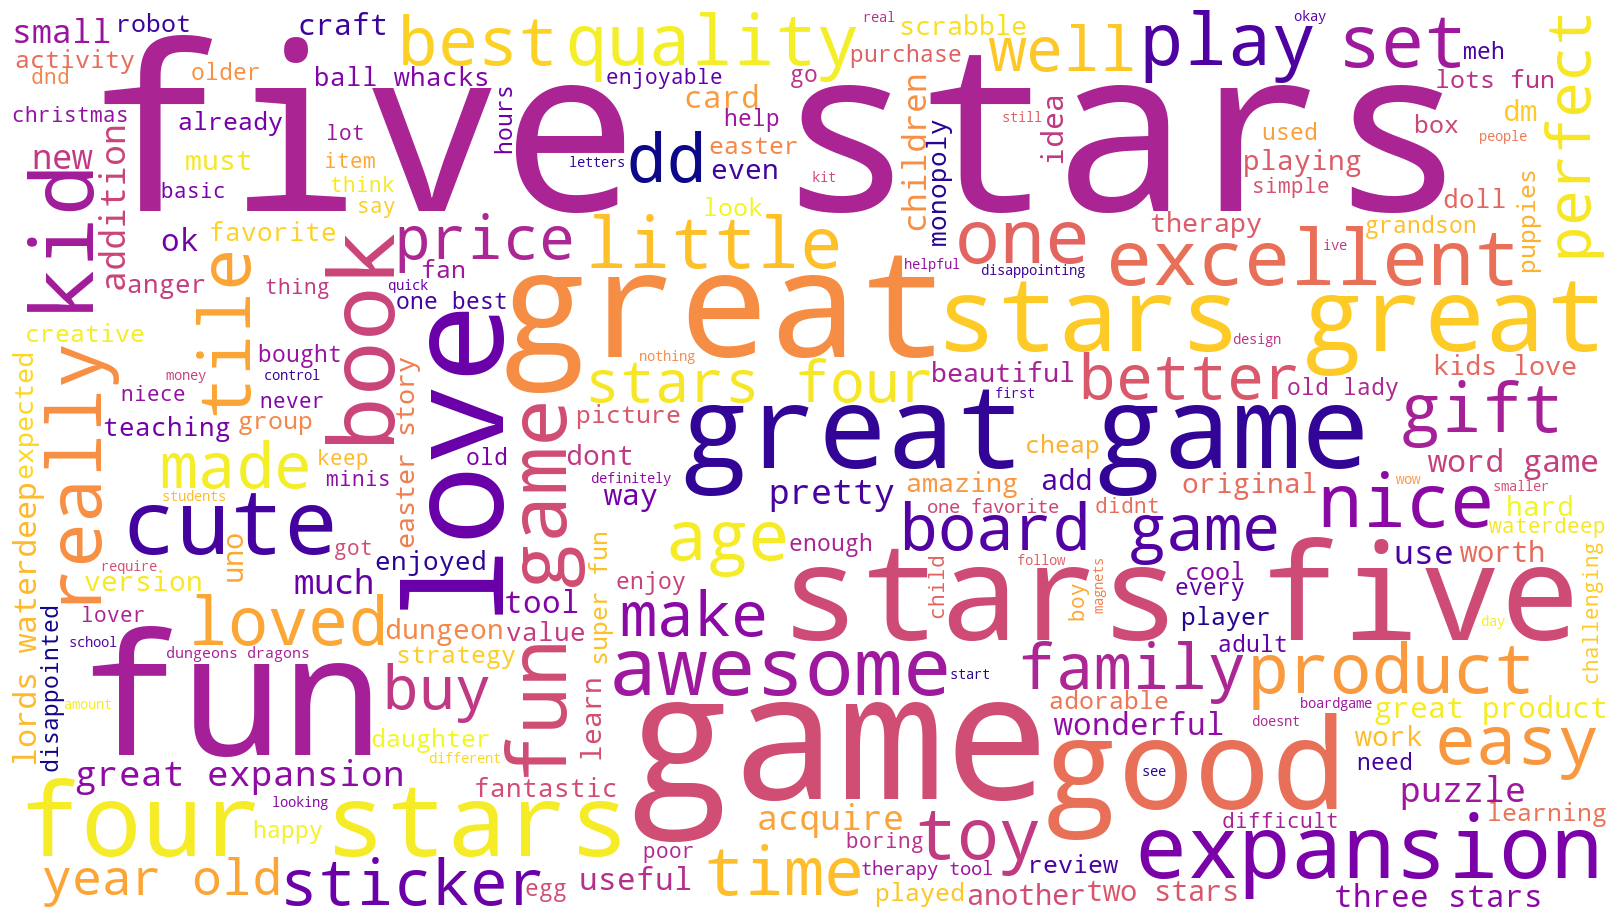

In [462]:
# Summary: Plot the WordCloud image.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string_2) 
                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Frequency distribution and polarity
### Create frequency distribution

In [463]:
# Determine the frequency distribution: Review.
fdist_r = FreqDist(tokens_r)
# Preview the data.
fdist_r

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [464]:
# Summary:
fdist_s = FreqDist(tokens_s)
fdist_s

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [467]:
# Generate a DataFrame from Counter for the review column.
counts_review = pd.DataFrame(Counter(tokens_r).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
counts_review

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

In [468]:
# Generate a DataFrame from Counter for the review column.
counts_summary = pd.DataFrame(Counter(tokens_s).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
counts_summary

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

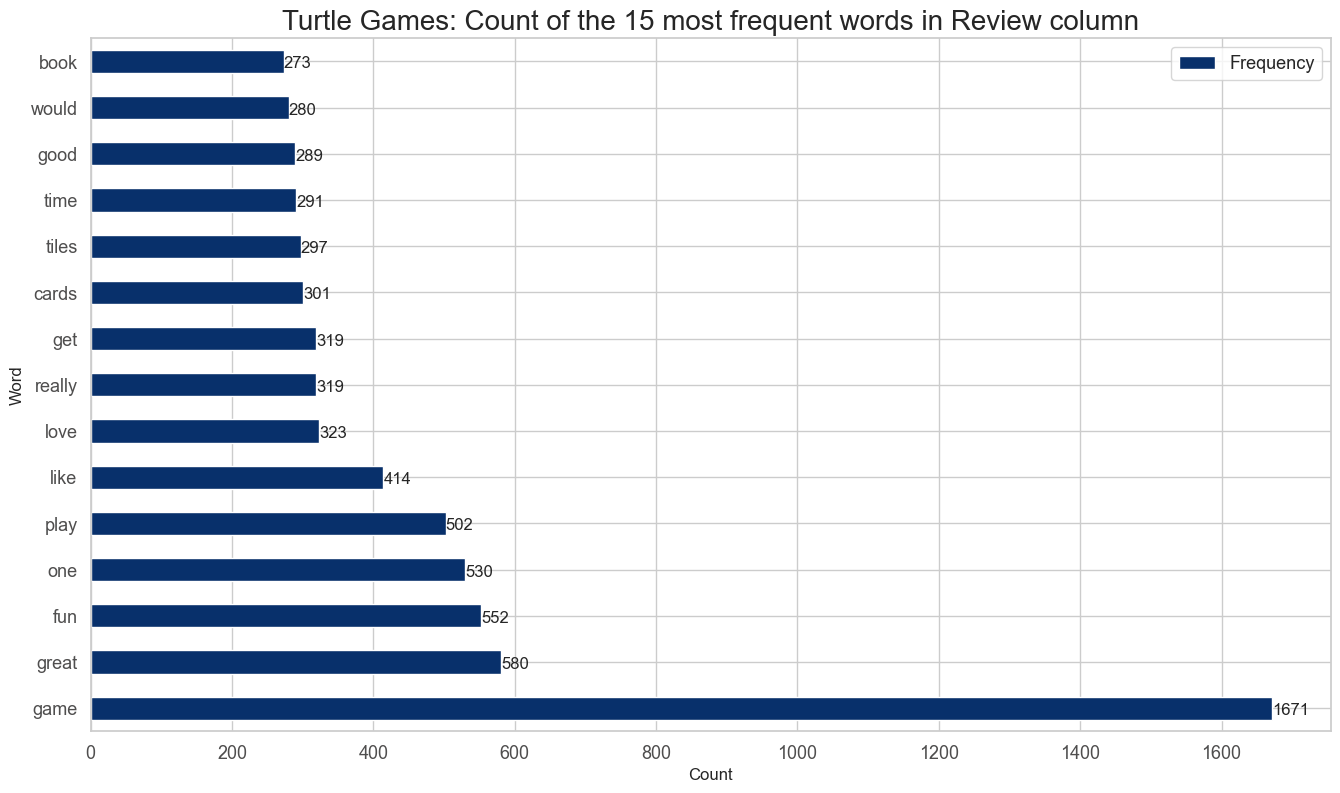

In [492]:
# Plot top 15 most frequent words:
# Review column:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), colormap='Blues_r')

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games: Count of the 15 most frequent words in Review column",
             fontsize=20)
# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12)

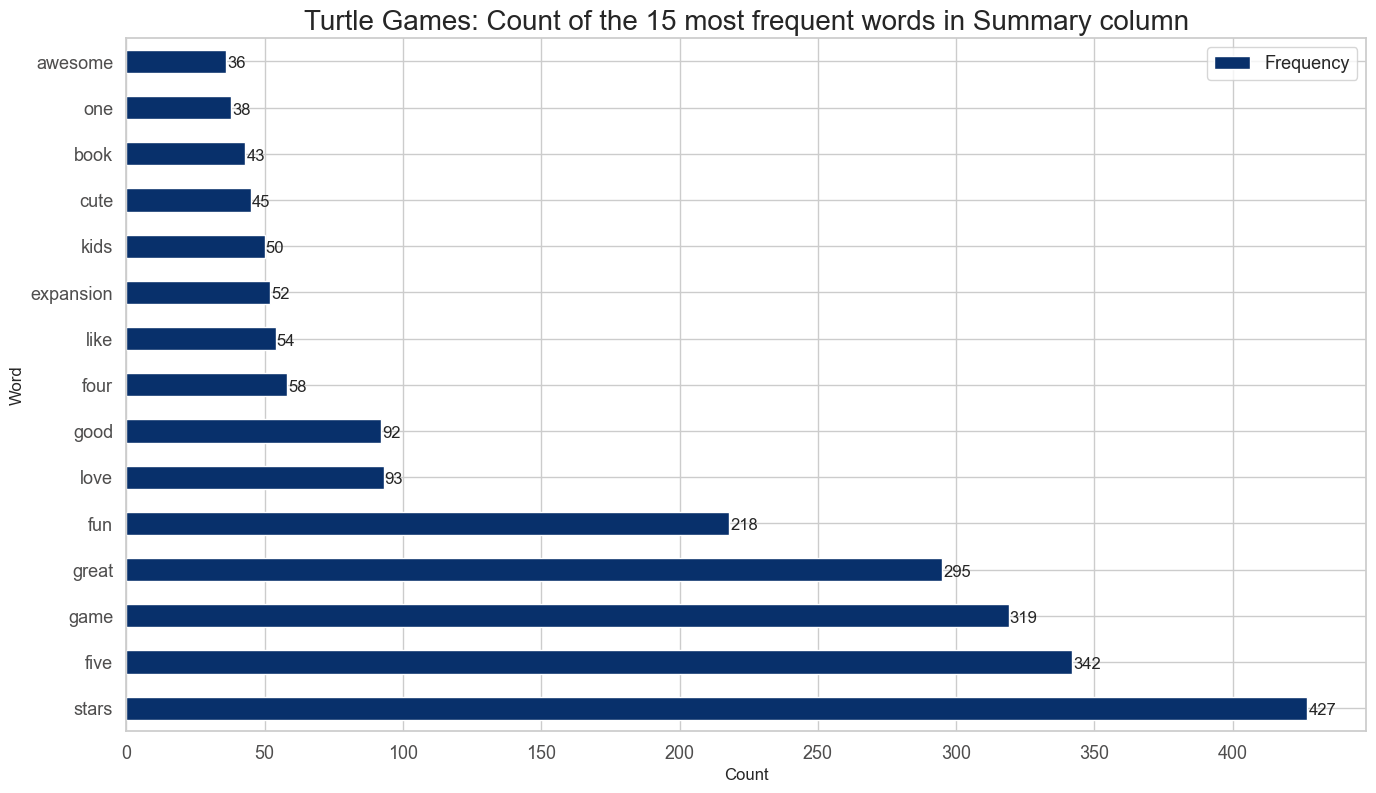

In [493]:
# Summary column:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), colormap='Blues_r')

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games: Count of the 15 most frequent words in Summary column",
             fontsize=20)
# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12)

## Review polarity and sentiment: 
### Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [494]:
# Provided function for polarity:
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]
# Provided function subjectivity.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [496]:
# Determine polarity and Subjectivity of both columns. 
# Review:
# Populate a new column with polarity scores for review column.
no_dup['polarity_review'] = no_dup['review'].apply(generate_polarity)
no_dup['subjectivity_review'] = no_dup['review'].apply(generate_subjectivity)

# View output.
no_dup[['polarity_review', 'subjectivity_review']].head()


polarity_review  subjectivity_review
0        -0.036111             0.486111
1         0.035952             0.442976
2         0.116640             0.430435
3         0.578788             0.784848
4        -0.316667             0.316667

In [498]:
# Populate a new column with polarity scores for summary column.
no_dup['polarity_summary'] = no_dup['summary'].apply(generate_polarity)
no_dup['subjectivity_summary'] = no_dup['summary'].apply(generate_subjectivity)

# View output.
no_dup[['polarity_summary', 'subjectivity_summary']].head()

polarity_summary  subjectivity_summary
0              0.15              0.500000
1             -0.80              0.900000
2              0.00              0.733333
3              0.00              0.000000
4              0.00              0.000000

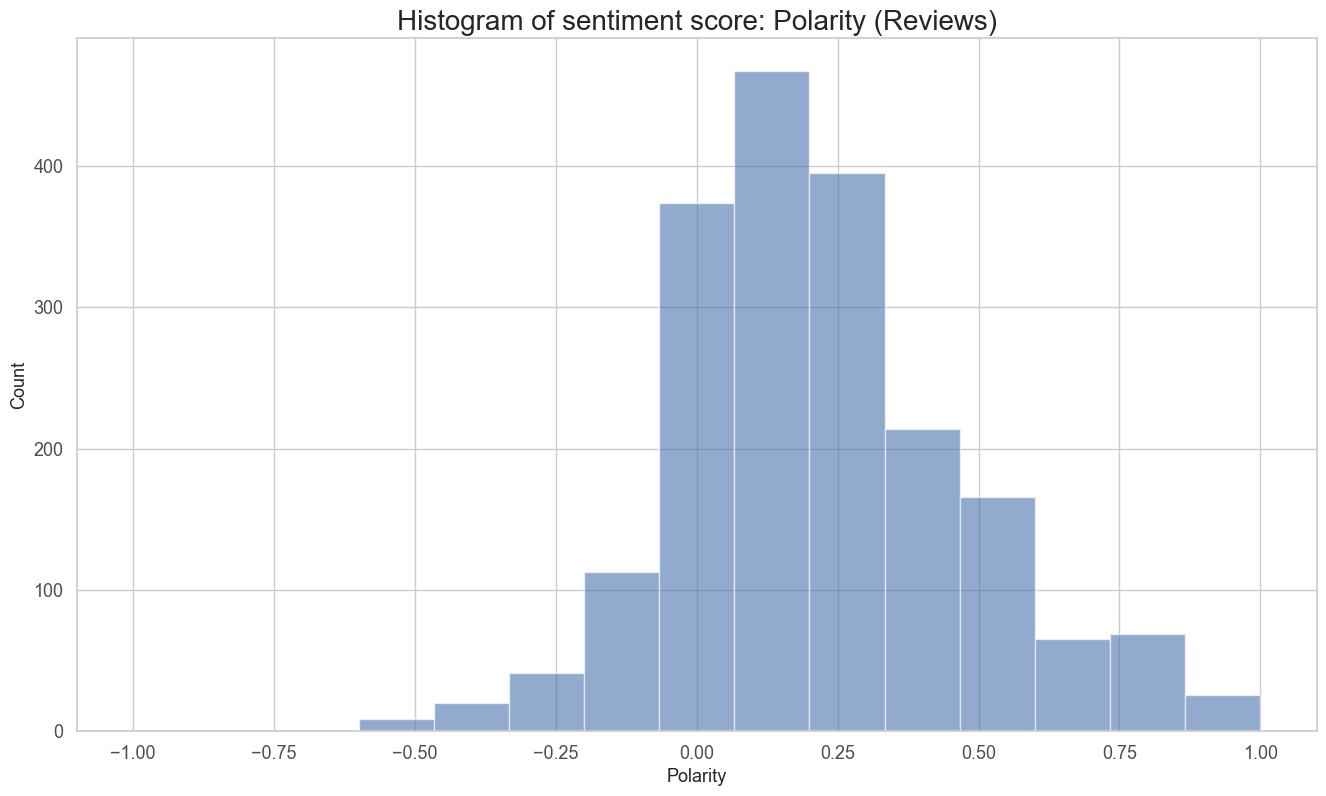

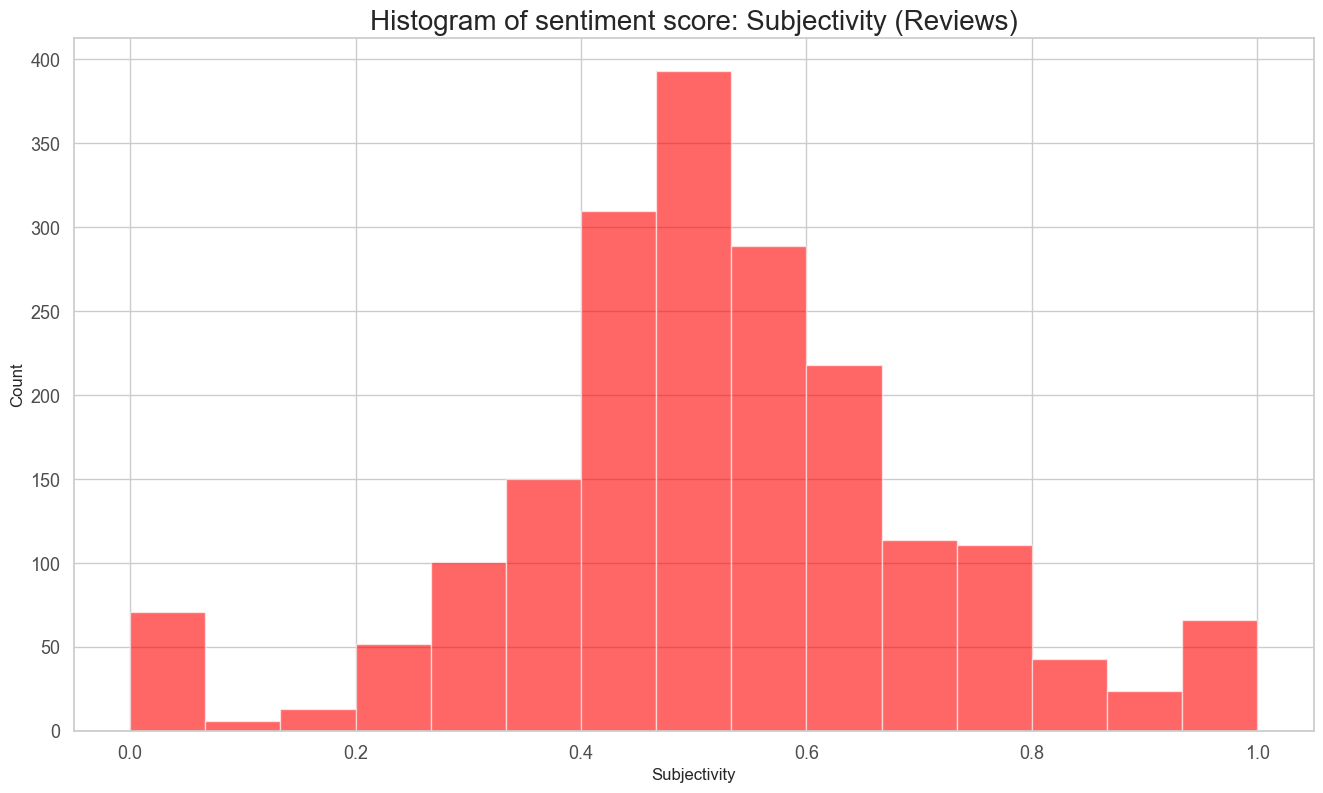

In [516]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(no_dup['polarity_review'], num_bins, alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Histogram of sentiment score: Polarity (Reviews)', fontsize = 20)

plt.show()

# Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(no_dup['subjectivity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score: Subjectivity (Reviews)', fontsize=20)

plt.show()

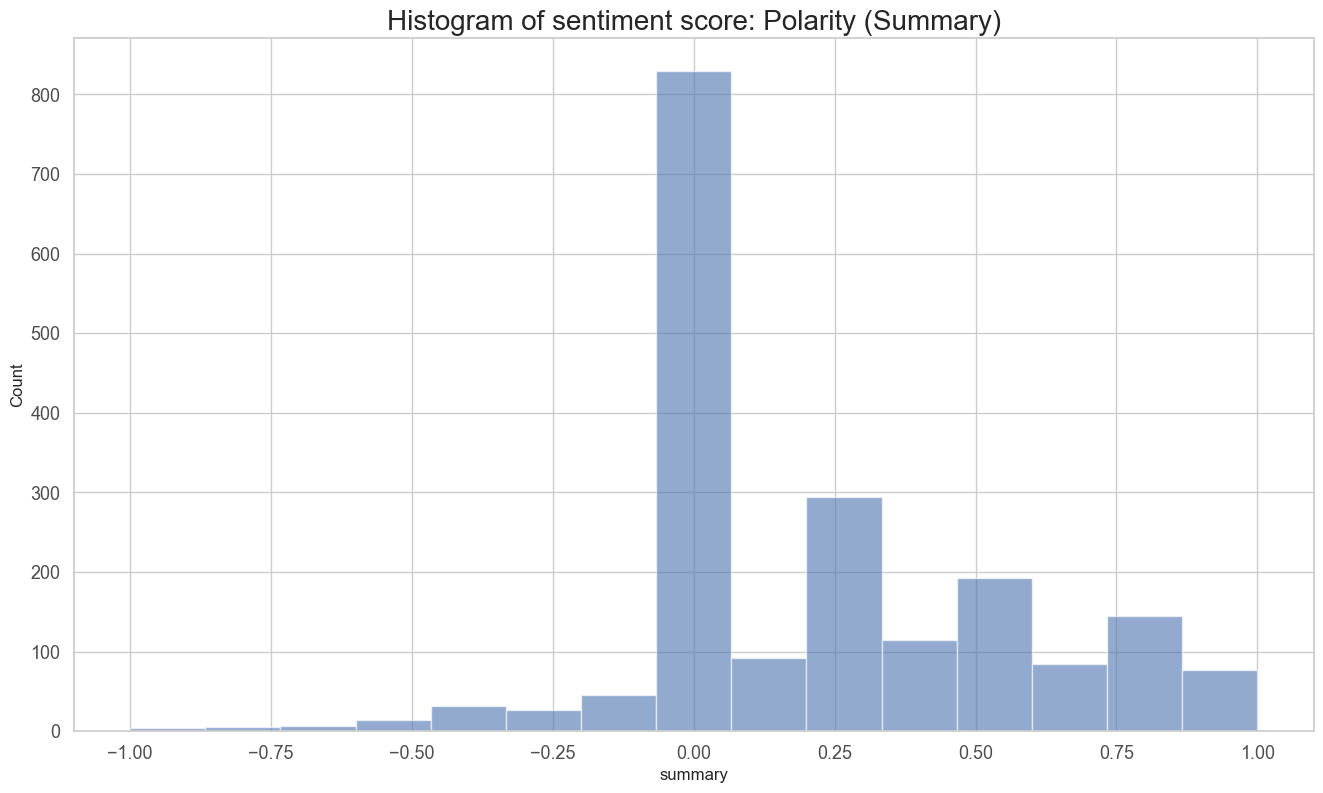

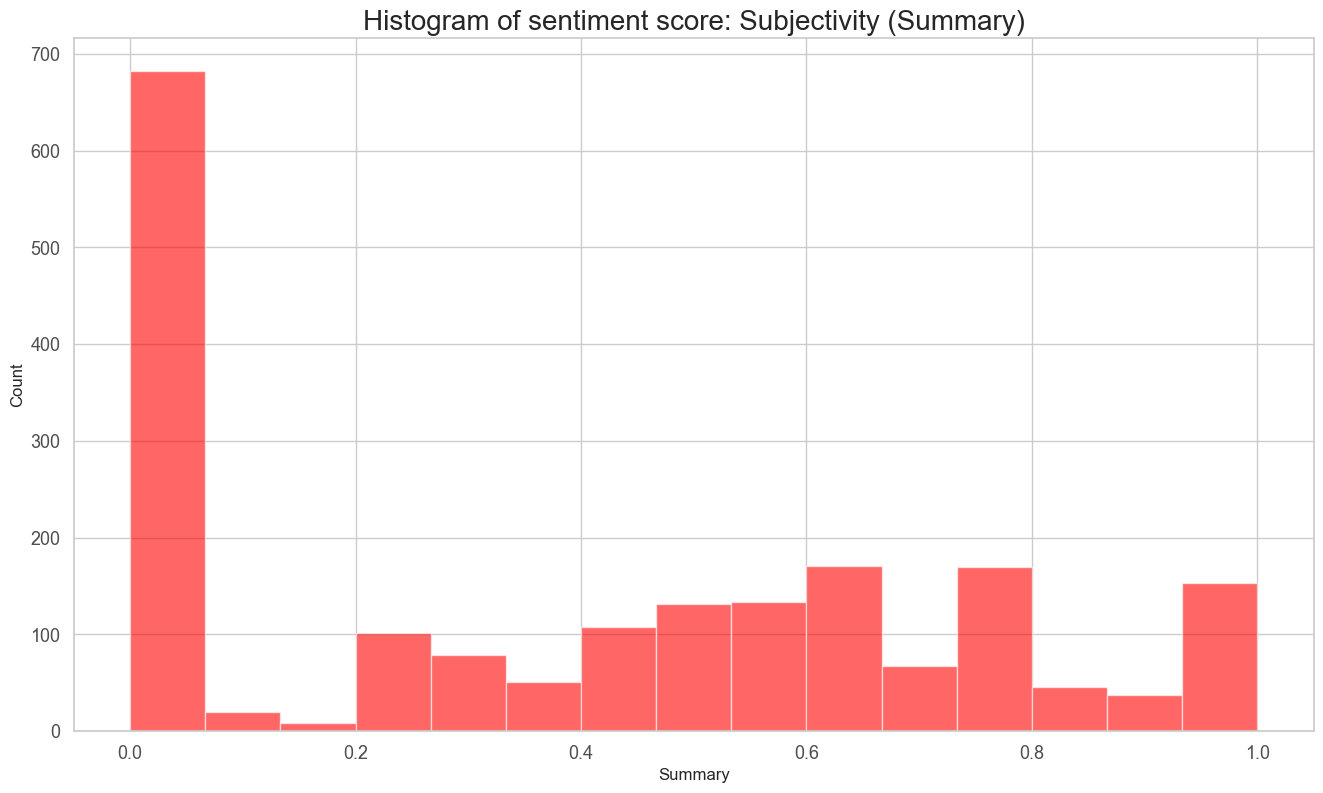

In [518]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(no_dup['polarity_summary'], num_bins, alpha=0.6)

# Set the labels.
plt.xlabel('summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score: Polarity (Summary)', fontsize=20)

plt.show()

# Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(no_dup['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score: Subjectivity (Summary)', fontsize=20)

plt.show()

## Identify top 20 positive and negative reviews and summaries respectively

In [502]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_reviews = no_dup.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'polarity_review']]

# Adjust the column width and view the output.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})


In [504]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summary = no_dup.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary']]

# Adjust the column width and view the output.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [505]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_reviews = no_dup.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_reviews = positive_reviews[['review', 'polarity_review']]

# Adjust the column width and view the output.
positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [506]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summary = no_dup.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_summary = positive_summary[['summary', 'polarity_summary']]

# Adjust the column width and view the output.
positive_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

## Insights and observations

Having performed the necessary data cleaning for Natural Language Processing, which included transforming each review and summary description in lowercase, deleting the various punctuation symbols and duplicates as well we can begin the tokenisation of each word to start seeing the frequency in which they appear. By eliminating the stopwords from the count of the frequency distribution of each word we can see the most frequent words in the review and summary columns: 
* 'game', 'fun', 'great' appear in both counts near the top.
* in the summary column we can see that 'five' and 'stars' are the most frequent words. While 'stars' is the number 1 in the summary column the difference with 'five' is not too large (427 counts for stars and 342 for five) as well as four (58 counts) also being in the top we can deduce that the majority of those reviews are positive.
* 'one' also appears in the top words for summary but only with 38 counts.

After analysing the frquency of words we can also move onto the polarity and subjectivity scores in the sentiment analysis.

Polarity is a measure assigned to each comment/review that varies from -1 to 1 with -1 as a fully negative comment, 0 for neutrality, and 1 for positive reviews.
* From the graphs, we can infer that the sentiment score for polarity in both columns leans towards positive reviews/summary as the histograph has a strong neutral presence but is skewed towards the right meaning the sentiment leans in a positive direction.

Subjectivity, on the other hand, analyses how subjective or objective reviews and comments are and its score ranges between 0 and 1, with the former meaning highly objective and the latter meaning highly subjective comments.
* From the histographs, we can see that in the reviews column the comments seem more of a mix between subjective and objective information as there are high peaks in the center, while in the summary column the highest peak is on the 0 value meaning more objective comments.